# Load data

### Load vcf as pandas dataframes

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import math
import os
import glob

In [3]:
# Connect script to Google Drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [39]:
# Read vcf file
# Transform vcf to excel files
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/50f_HC_PT_o.csv")

In [40]:
# Copy to reload original information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [41]:
annovar_train = df.loc[:, df.columns != 'db'].copy()
annovar_train.head()

patient_id  wavelet-HLH_glcm_Correlation  \
0    MPC281_20150826                      0.196055   
1   MPC_100_20100916                      0.629049   
2   MPC_100_20161207                      1.265483   
3  MPC_1018_20210707                      5.804816   
4   MPC_101_20130628                      0.967672   

   wavelet-LHH_glcm_Correlation  wavelet-LHH_firstorder_Median  \
0                      0.002972                      -1.140652   
1                     -0.130871                      -0.405597   
2                      0.385412                      -1.151246   
3                      6.076768                       0.098205   
4                     -0.006456                      -0.722046   

   wavelet-HHL_firstorder_Skewness  original_glcm_Correlation  \
0                         0.472947                   0.464318   
1                         0.881075                   0.695429   
2                        -0.234917                   0.248576   
3                         2.529857                   0.138018   
4                         0.599194                   0.800179   

   log-sigma-1-0-mm-3D_glcm_Correlation  wavelet-HLH_firstorder_Median  \
0                              1.064301                      -1.102450   
1                              0.272063                       0.497713   
2                              0.463334                       0.807866   
3                              0.591358                       1.714051   
4                             -0.096409                      -0.591069   

   wavelet-HHH_firstorder_Skewness  wavelet-LHH_firstorder_Mean  \
0                         0.115214                    -0.628742   
1                         0.791520                    -0.718252   
2                         0.207478                    -0.573870   
3                        -0.967044                    -0.399698   
4                        -0.371389                    -0.793719   

   original_firstorder_Minimum  \
0                    -0.690049   
1                    -0.640134   
2                    -0.858233   
3                     0.373997   
4                     0.519677   

   wavelet-LLL_glrlm_ShortRunLowGrayLevelEmphasis  \
0                                        0.427184   
1                                       -0.772427   
2                                       -0.632641   
3                                       -0.392531   
4                                        0.421052   

   wavelet-LLH_firstorder_Skewness  wavelet-HLL_firstorder_Skewness  \
0                         0.551516                         1.348219   
1                        -0.108865                         1.585993   
2                         1.159132                         1.035199   
3                       -16.003968                       -13.695781   
4                        -0.449530                         0.238416   

   log-sigma-2-0-mm-3D_firstorder_Median  original_gldm_LowGrayLevelEmphasis  \
0                              -0.870293                           -0.728960   
1                               0.542607                           -0.177386   
2                              -1.368993                           -0.223558   
3                               0.107495                            0.053793   
4                               0.583742                            0.900719   

   original_glcm_MaximumProbability  wavelet-LHL_glcm_Id  \
0                          0.123918            -0.015881   
1                          0.225330             1.289422   
2                         -0.646587            -0.801820   
3                         -0.428956            -0.612031   
4                          0.000204             1.152533   

   log-sigma-1-0-mm-3D_glcm_SumEntropy  original_glcm_Id  \
0                             0.277797          0.042332   
1                            -1.050077          0.913143   
2                             0.702630         -1.005399   
3               

In [42]:
annovar_train.columns.values

array(['patient_id', 'wavelet-HLH_glcm_Correlation',
       'wavelet-LHH_glcm_Correlation', 'wavelet-LHH_firstorder_Median',
       'wavelet-HHL_firstorder_Skewness', 'original_glcm_Correlation',
       'log-sigma-1-0-mm-3D_glcm_Correlation',
       'wavelet-HLH_firstorder_Median', 'wavelet-HHH_firstorder_Skewness',
       'wavelet-LHH_firstorder_Mean', 'original_firstorder_Minimum',
       'wavelet-LLL_glrlm_ShortRunLowGrayLevelEmphasis',
       'wavelet-LLH_firstorder_Skewness',
       'wavelet-HLL_firstorder_Skewness',
       'log-sigma-2-0-mm-3D_firstorder_Median',
       'original_gldm_LowGrayLevelEmphasis',
       'original_glcm_MaximumProbability', 'wavelet-LHL_glcm_Id',
       'log-sigma-1-0-mm-3D_glcm_SumEntropy', 'original_glcm_Id',
       'wavelet-LHL_glrlm_GrayLevelNonUniformity',
       'wavelet-HLL_glcm_Imc1',
       'log-sigma-2-0-mm-3D_firstorder_RootMeanSquared',
       'wavelet-LLL_glcm_ClusterTendency',
       'wavelet-LLL_glcm_DifferenceAverage',
       'wavelet-HHL

# Train data analysis

In [59]:
len(annovar_train.columns.values)

52

In [44]:
# Delete colums not providing any information
drop_headers = annovar_train.columns.values
new_headers = []
dropped_headers = []
for head in drop_headers:
  if len(np.unique(annovar_train[head])) == 1:
    annovar_train.drop(head, axis=1, inplace=True)
    dropped_headers.append(head)
    print('Deleted column without information: ' + str(head) )
  else:
    new_headers.append(head)

In [45]:
annovar_train['gt'] = annovar_train['patient_id'].str.contains('MPC')

In [46]:
# Check any possible column with NaN values
nan_values = annovar_train.isna()
nan_columns = nan_values.any()

columns_with_nan = annovar_train.columns[nan_columns].tolist()
print(columns_with_nan)

[]


In [49]:
annovar_train.describe()

wavelet-HLH_glcm_Correlation  wavelet-LHH_glcm_Correlation  \
count                  6.380000e+02                    638.000000   
mean                   1.752661e-01                      0.106975   
std                    8.499558e-01                      0.903943   
min                   -2.428039e+00                     -3.191037   
25%                   -3.881660e-01                     -0.431802   
50%                    9.996344e-17                      0.000000   
75%                    6.118340e-01                      0.568198   
max                    5.804816e+00                      6.076768   

       wavelet-LHH_firstorder_Median  wavelet-HHL_firstorder_Skewness  \
count                     638.000000                     6.380000e+02   
mean                       -0.021638                     2.932430e-01   
std                         0.838121                     1.749686e+00   
min                        -3.492854                    -2.638190e+00   
25%                        -0.506616                    -4.116696e-01   
50%                         0.000000                     5.009014e-17   
75%                         0.493384                     5.883304e-01   
max                         3.508826                     2.278257e+01   

       original_glcm_Correlation  log-sigma-1-0-mm-3D_glcm_Correlation  \
count                 638.000000                            638.000000   
mean                    0.102438                              0.053794   
std                     0.834390                              0.807347   
min                    -2.422934                             -3.302717   
25%                    -0.467826                             -0.472956   
50%                     0.000000                              0.000000   
75%                     0.532174                              0.527044   
max                     3.615724                              3.428893   

       wavelet-HLH_firstorder_Median  wavelet-HHH_firstorder_Skewness  \
count                   6.380000e+02                       638.000000   
mean                   -1.414163e-03                        -0.303861   
std                     7.664076e-01                         3.077801   
min                    -3.448892e+00                       -48.655296   
25%                    -4.896105e-01                        -0.511563   
50%                     1.000719e-16                         0.000000   
75%                     5.103895e-01                         0.488437   
max                     2.501451e+00                        12.245714   

       wavelet-LHH_firstorder_Mean  original_firstorder_Minimum  \
count                 6.380000e+02                   638.000000   
mean                 -4.028663e-02                    -0.073133   
std                   6.056504e-01                     1.568687   
min                  -1.355386e+00                   -30.277878   
25%                  -6.130304e-01                    -0.480817   
50%                  -4.987330e-17                     0.000000   
75%                   3.869696e-01                     0.519183   
max                   2.258274e+00                     2.856116   

       wavelet-LLL_glrlm_ShortRunLowGrayLevelEmphasis  \
count                                    6.380000e+02   
mean                                     1.866945e+01   
std                                      3.323527e+02   
min                                     -1.627462e+00   
25%                                     -3.750250e-01   
50%                                     -2.999987e-16   
75%                                      6.249750e-01   
max                                      8.338643e+03   

       wavelet-LLH_firstorder_Skewness  wavelet-HLL_firstorder_Skewness  \
count                       638.000000                       638.000000   
mean                         -0.416654                        -0.224343   
std                           2.635773                     

<ipython-input-12-728abf000b5c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = annovar_ft_num.corr()


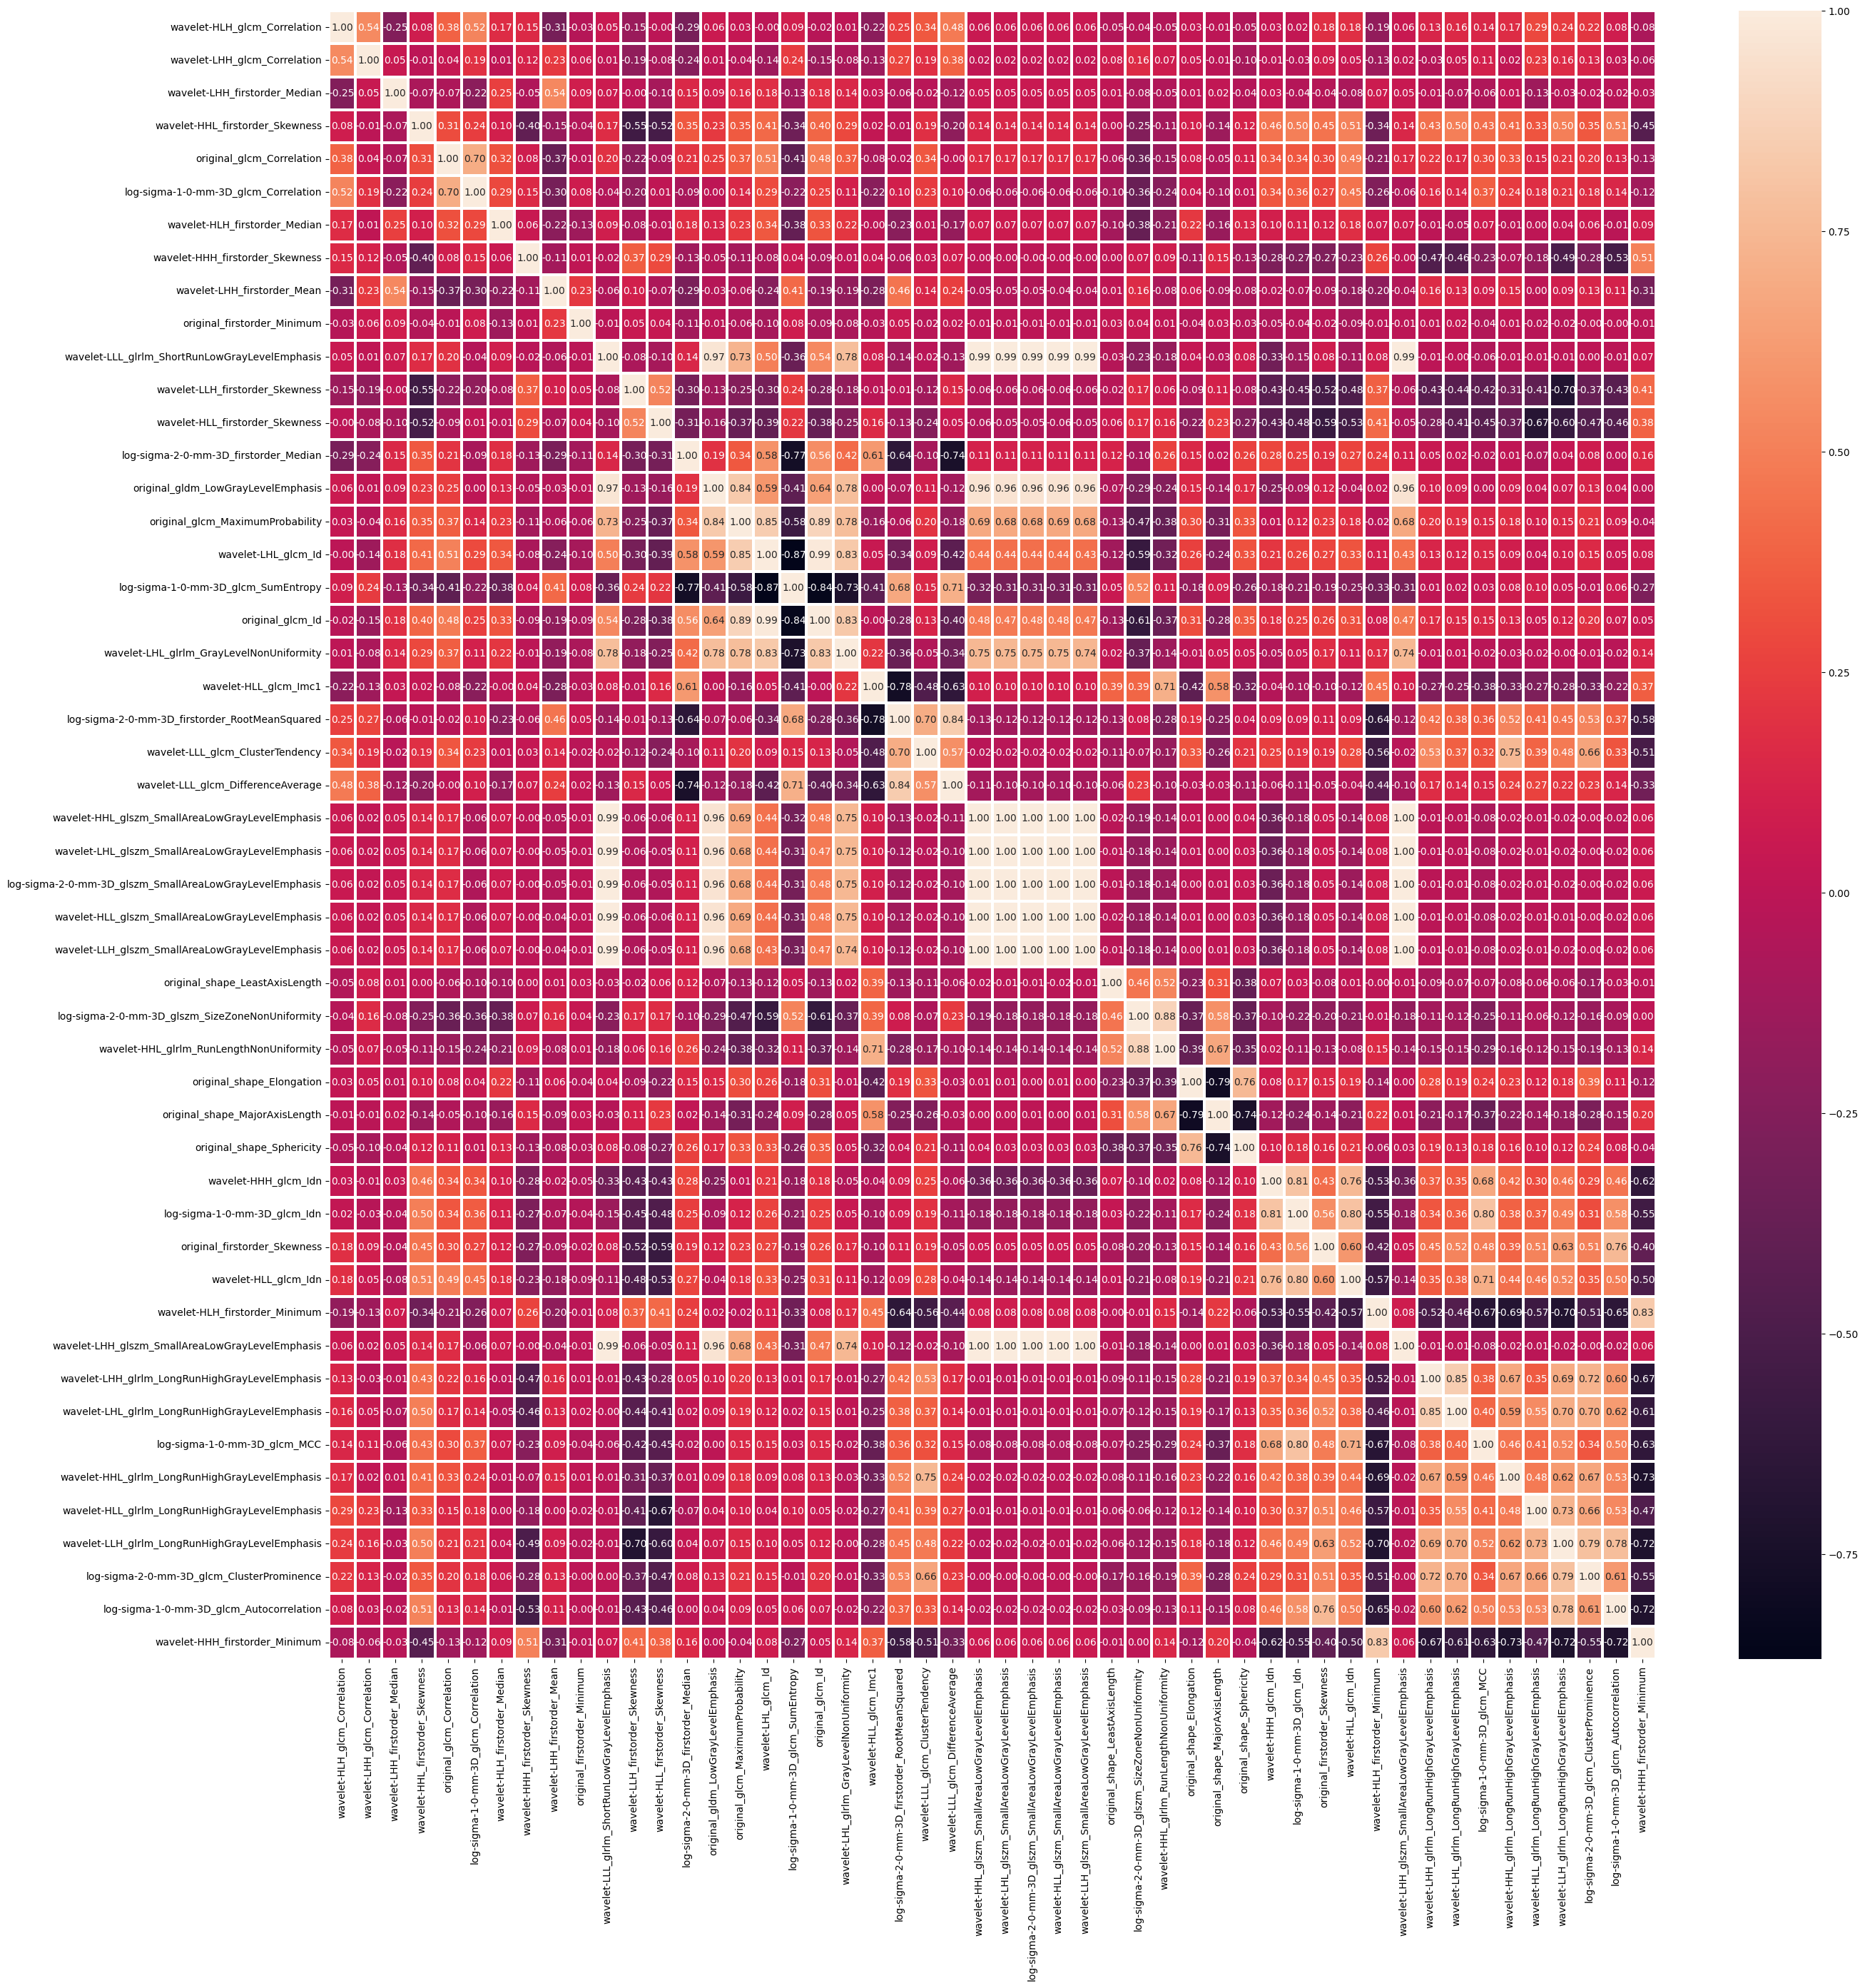

In [12]:
# Non-binary plot correlation matrix
annovar_ft_num = annovar_train.copy()

corr = annovar_ft_num.corr()

f,ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

<ipython-input-28-b51820d62780>:10: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  plot_df = annovar_train[headers].set_axis(plot_headers, axis='columns', inplace = False)
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Text(0.5, 0.9, 'Histograms of labeled features')

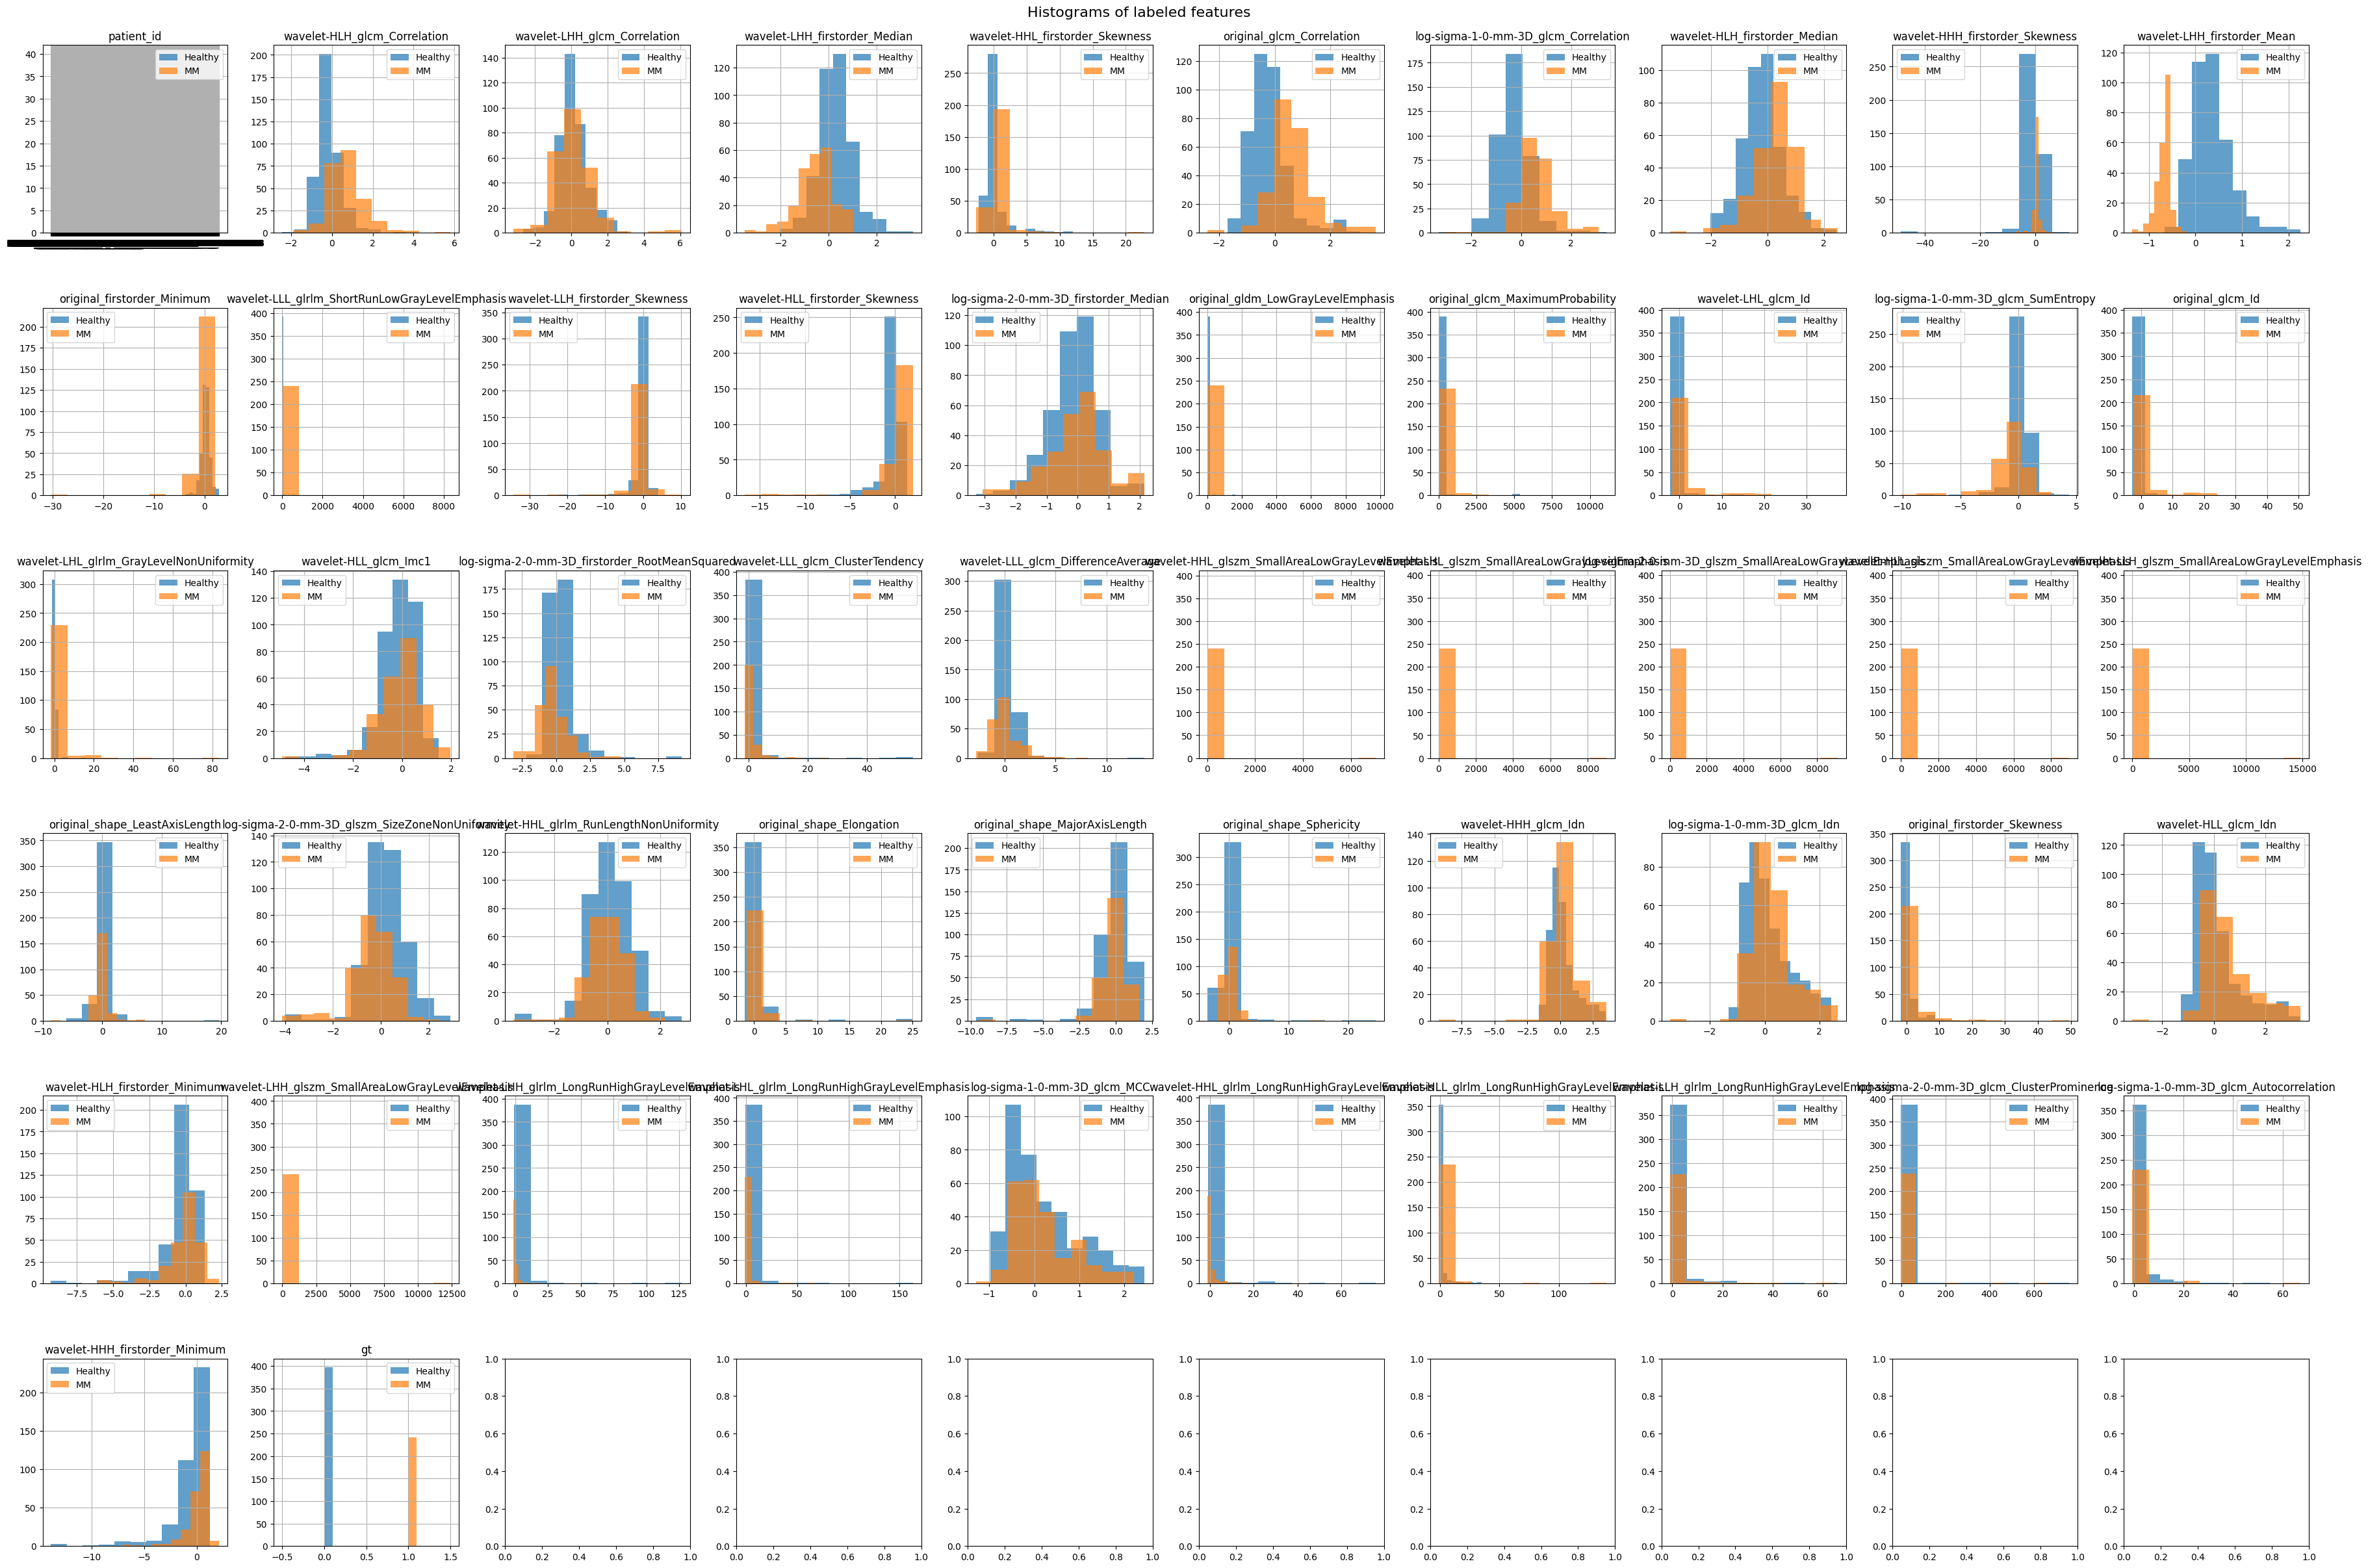

In [28]:
# Non.binary categories histograms
from math import floor
from math import ceil

#annovar_ft_lists = annovar_train.select_dtypes(include=['float64'])
annovar_train["gt"] = annovar_train["gt"]
headers = annovar_train.columns

plot_headers = [s.replace('_rankscore','') for s in headers]
plot_df = annovar_train[headers].set_axis(plot_headers, axis='columns', inplace = False)

length = len(headers)
ncol = 10
nrow = ceil(length/ncol)

fig, axes = plt.subplots(nrows=nrow, ncols=ncol)
plt.subplots_adjust(wspace=0.25, hspace=0.4)
fig.set_figheight(30)
fig.set_figwidth(45)
labels = {False: 'Healthy', True:'MM'}

for num, head in enumerate(plot_headers):
  i = floor(num/ncol)
  j = num%ncol
  for k, d, in (plot_df.groupby('gt')[head]):
      d.hist(alpha=0.7, ax=axes[i,j], label=labels[k])
      axes[i,j].legend()

  #plot_df.groupby('gt')[head].hist(ax=axes[i, j], alpha = 0.7, label=['Neutral', 'Driver'])
  axes[i, j].set_title(head)
plt.suptitle("Histograms of labeled features", y=0.9, fontsize = 16)

Text(0.5, 0.9, 'Boxplot of rankscores distributions')

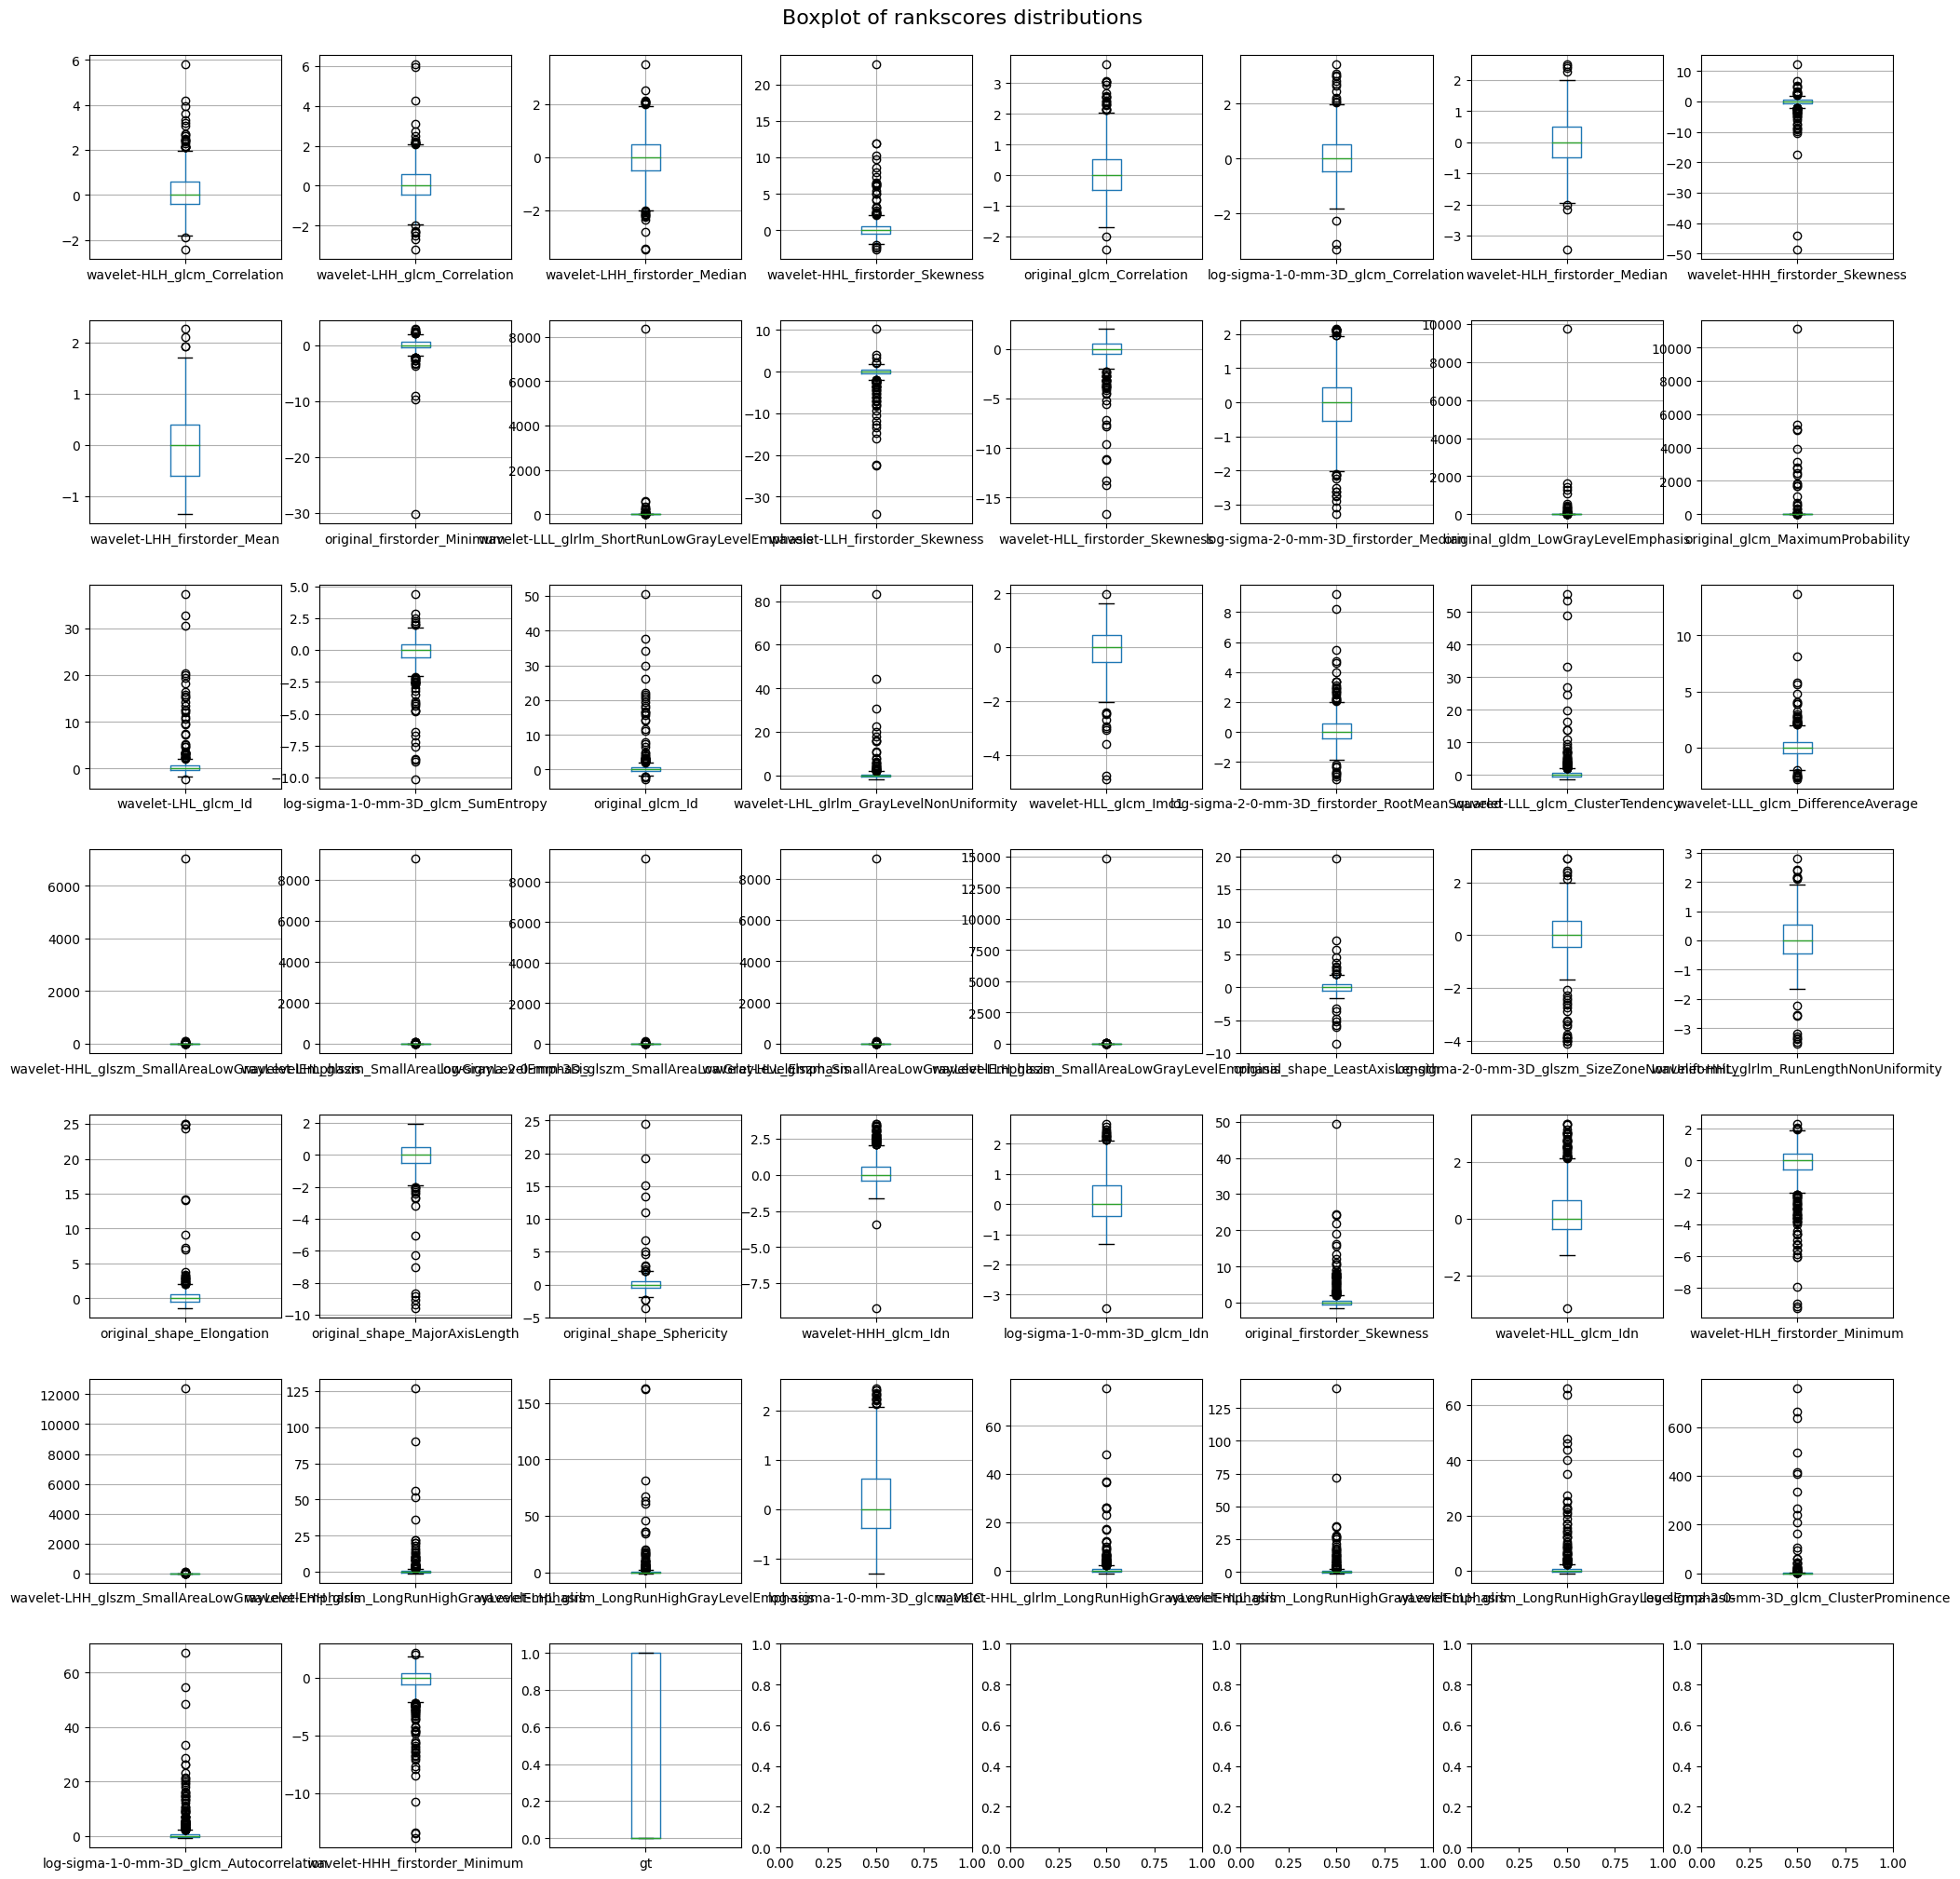

In [51]:
# Non.binary categories box plot
from math import floor
fig, axes = plt.subplots(nrows=7, ncols=8)
plt.subplots_adjust(wspace=0.2, hspace=0.3)
fig.set_figheight(25)
fig.set_figwidth(25)

for num, head in enumerate(headers):
  i = floor(num/8)
  j = num%8

  annovar_train.boxplot(column = head, ax=axes[i, j], return_type='axes')
  #axes[i, j].set_title(head)
fig.suptitle("Boxplot of rankscores distributions", y=0.9, fontsize = 16)

In [52]:
# Non-binary categories scatter plot WITHOUT NONES
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="darkgrid")
sns.pairplot(annovar_train, kind="hist", plot_kws=dict(bins=20, cbar=False, cmap='viridis', cbar_kws=dict(shrink=.5)))
#axes = scatter_matrix(annovar_train, alpha=0.6, figsize=(40, 40), diagonal='hist',labels=annovar_train['gt'])

# CLASSIFICATION ANALYSIS

### Data preparation

In [53]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
tf.random.set_seed(43)

In [57]:
columns = annovar_train.columns.tolist()
columns = [c for c in columns if c not in ["patient_id","gt"]]
target = "gt"
annovar_train.gt = annovar_train['gt'].map({False: 0, True: 1})

In [58]:
#annovar_ft_final.describe().loc['max']
annovar_train.describe()

wavelet-HLH_glcm_Correlation  wavelet-LHH_glcm_Correlation  \
count                  6.380000e+02                    638.000000   
mean                   1.752661e-01                      0.106975   
std                    8.499558e-01                      0.903943   
min                   -2.428039e+00                     -3.191037   
25%                   -3.881660e-01                     -0.431802   
50%                    9.996344e-17                      0.000000   
75%                    6.118340e-01                      0.568198   
max                    5.804816e+00                      6.076768   

       wavelet-LHH_firstorder_Median  wavelet-HHL_firstorder_Skewness  \
count                     638.000000                     6.380000e+02   
mean                       -0.021638                     2.932430e-01   
std                         0.838121                     1.749686e+00   
min                        -3.492854                    -2.638190e+00   
25%                        -0.506616                    -4.116696e-01   
50%                         0.000000                     5.009014e-17   
75%                         0.493384                     5.883304e-01   
max                         3.508826                     2.278257e+01   

       original_glcm_Correlation  log-sigma-1-0-mm-3D_glcm_Correlation  \
count                 638.000000                            638.000000   
mean                    0.102438                              0.053794   
std                     0.834390                              0.807347   
min                    -2.422934                             -3.302717   
25%                    -0.467826                             -0.472956   
50%                     0.000000                              0.000000   
75%                     0.532174                              0.527044   
max                     3.615724                              3.428893   

       wavelet-HLH_firstorder_Median  wavelet-HHH_firstorder_Skewness  \
count                   6.380000e+02                       638.000000   
mean                   -1.414163e-03                        -0.303861   
std                     7.664076e-01                         3.077801   
min                    -3.448892e+00                       -48.655296   
25%                    -4.896105e-01                        -0.511563   
50%                     1.000719e-16                         0.000000   
75%                     5.103895e-01                         0.488437   
max                     2.501451e+00                        12.245714   

       wavelet-LHH_firstorder_Mean  original_firstorder_Minimum  \
count                 6.380000e+02                   638.000000   
mean                 -4.028663e-02                    -0.073133   
std                   6.056504e-01                     1.568687   
min                  -1.355386e+00                   -30.277878   
25%                  -6.130304e-01                    -0.480817   
50%                  -4.987330e-17                     0.000000   
75%                   3.869696e-01                     0.519183   
max                   2.258274e+00                     2.856116   

       wavelet-LLL_glrlm_ShortRunLowGrayLevelEmphasis  \
count                                    6.380000e+02   
mean                                     1.866945e+01   
std                                      3.323527e+02   
min                                     -1.627462e+00   
25%                                     -3.750250e-01   
50%                                     -2.999987e-16   
75%                                      6.249750e-01   
max                                      8.338643e+03   

       wavelet-LLH_firstorder_Skewness  wavelet-HLL_firstorder_Skewness  \
count                       638.000000                       638.000000   
mean                         -0.416654                        -0.224343   
std                           2.635773                     

from matplotlib import pyplot as plt
_df_0['wavelet-HLH_glcm_Correlation'].plot(kind='hist', bins=20, title='wavelet-HLH_glcm_Correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['wavelet-LHH_glcm_Correlation'].plot(kind='hist', bins=20, title='wavelet-LHH_glcm_Correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['wavelet-LHH_firstorder_Median'].plot(kind='hist', bins=20, title='wavelet-LHH_firstorder_Median')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['wavelet-HHL_firstorder_Skewness'].plot(kind='hist', bins=20, title='wavelet-HHL_firstorder_Skewness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='wavelet-HLH_glcm_Correlation', y='wavelet-LHH_glcm_Correlation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='wavelet-LHH_glcm_Correlation', y='wavelet-LHH_firstorder_Median', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='wavelet-LHH_firstorder_Median', y='wavelet-HHL_firstorder_Skewness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='wavelet-HHL_firstorder_Skewness', y='original_glcm_Correlation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['wavelet-HLH_glcm_Correlation'].plot(kind='line', figsize=(8, 4), title='wavelet-HLH_glcm_Correlation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['wavelet-LHH_glcm_Correlation'].plot(kind='line', figsize=(8, 4), title='wavelet-LHH_glcm_Correlation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['wavelet-LHH_firstorder_Median'].plot(kind='line', figsize=(8, 4), title='wavelet-LHH_firstorder_Median')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['wavelet-HHL_firstorder_Skewness'].plot(kind='line', figsize=(8, 4), title='wavelet-HHL_firstorder_Skewness')
plt.gca().spines[['top', 'right']].set_visible(False)

In [136]:
columns = annovar_train.columns.tolist()
for col in columns:
  if 'firstorder' in col:
    print('Deleted column: ', col)
    annovar_train.drop(col, axis=1, inplace=True)

Deleted column:  wavelet-LHH_firstorder_Median
Deleted column:  wavelet-HHL_firstorder_Skewness
Deleted column:  wavelet-HLH_firstorder_Median
Deleted column:  wavelet-HHH_firstorder_Skewness
Deleted column:  original_firstorder_Minimum
Deleted column:  wavelet-LLH_firstorder_Skewness
Deleted column:  wavelet-HLL_firstorder_Skewness
Deleted column:  log-sigma-2-0-mm-3D_firstorder_Median
Deleted column:  log-sigma-2-0-mm-3D_firstorder_RootMeanSquared
Deleted column:  original_firstorder_Skewness
Deleted column:  wavelet-HLH_firstorder_Minimum
Deleted column:  wavelet-HHH_firstorder_Minimum


In [137]:
len(annovar_train.columns)
columns = annovar_train.columns.tolist()
columns = [c for c in columns if c not in ["patient_id","gt"]]

In [138]:
X = np.array(annovar_train[columns])
X.shape

(638, 37)

In [139]:
y = np.array(annovar_train['gt'].astype(int))
y.shape

(638,)

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [141]:
# X_train = np.array(annovar_train[features_of_interest])
# X_test = np.array(annovar_test[features_of_interest])

# y_train = np.array(annovar_train['gt'].astype(int))
# y_test = np.array(annovar_test['gt'].astype(int))
# x = np.concatenate((X_train, X_test))
# y = np.concatenate((y_train, y_test))
# final_df = pd.concat([annovar_train[features_of_interest],annovar_test[features_of_interest]],ignore_index=True)
print('Training data cases: ', len(X_train), ' Test data cases: ', len(X_test))

Training data cases:  478  Test data cases:  160


In [142]:
len(columns)

37

In [143]:
(uniq, freq) = (np.unique(y_train, return_counts=True))
print('Training GT: ' + str(np.column_stack((uniq,freq))))

Training GT: [[  0 297]
 [  1 181]]


In [144]:
(uniq, freq) = (np.unique(y_test, return_counts=True))
print('Testing GT: ' + str(np.column_stack((uniq,freq))))

Testing GT: [[  0 100]
 [  1  60]]


### ALL CLASSIFICATION TRAINING

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot
import pickle
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# Models to be tried

models = {'Logistic': LogisticRegression(random_state=42, max_iter=1000), 'SVM':SVC(random_state=42, max_iter= 10000),
          'DecisionTree': DecisionTreeClassifier(random_state=42), 'RF': RandomForestClassifier(random_state=42),
          'XGB': XGBClassifier(random_state=42)}

hyperpar = {'Logistic': {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'C':  [100, 10, 1.0, 0.1, 0.01],
                         'tol': [1e-3, 1e-4, 1e-5]},
            'SVM': {'C': [0.01, 0.1, 1, 10, 100],
                    'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
                    'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'],
                    'tol': [1e-3, 1e-4, 1e-2]},
            'DecisionTree': {'max_depth': list(range(2, 20)),
                             'criterion': ['gini', 'entropy']},
            'RF': {'max_depth': list(range(2, 10)),
                   'criterion': ['gini', 'entropy'],
                   'max_features': ["auto", "log2", "None"],
                   'n_estimators': [100, 200, 300, 400, 500, 600],
                   'bootstrap': [True, False]},
            'XGB': {'n_estimators': [100, 200, 300, 400, 500, 600],
                    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.3, 0.5],
                    'max_depth': list(range(2, 10)),
                    'booster': ['gbtree', 'gblinear', 'dart']}}

final_A = {}
final_P = {}
final_R = {}
final_F1 = {}

for architecture in models:
  cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)
  model = models[architecture]

  space = hyperpar[architecture]
  #search = RandomizedSearchCV(estimator=model, param_distributions=space, scoring='f1', cv=cv_inner, refit=True, n_iter=30, n_jobs=-1, verbose=3)
  search = GridSearchCV(estimator=model, param_grid =space, scoring='f1', cv=cv_inner, refit=True, n_jobs=-1, verbose=1)

  result = search.fit(X_train, y_train)
  # get the best performing model fit on the whole training set
  best_model = result.best_estimator_
  path = "/content/drive/MyDrive/UPM-MASTER/2 INGLES/GATV - TFM/Feature Engineering/" + architecture + ".h5"
  pickle.dump(best_model, open(path, 'wb'))
  # evaluate model on the hold out dataset
  yhat = best_model.predict(X_test)
  # Precision
  P = metrics.precision_score(y_test,yhat)
  final_P[architecture] = P
  # Recall
  R = metrics.recall_score(y_test,yhat)
  final_R[architecture] = R
  # F1 score
  F1 = metrics.f1_score(y_test,yhat)
  final_F1[architecture] = F1
  # Accuracy
  acc = metrics.accuracy_score(y_test, yhat)
  final_A[architecture] = acc
	# report progress
  print('#####################################################################')
  print(architecture)
  print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))
  print('#####################################################################')

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


#####################################################################
SVM
>acc=0.846, est=0.763, cfg={'tol': 0.0001, 'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
#####################################################################
Fitting 5 folds for each of 30 candidates, totalling 150 fits
#####################################################################
DecisionTree
>acc=0.803, est=0.701, cfg={'max_features': 'sqrt', 'max_depth': 9, 'criterion': 'entropy'}
#####################################################################
Fitting 5 folds for each of 30 candidates, totalling 150 fits
#####################################################################
RF
>acc=0.845, est=0.742, cfg={'n_estimators': 500, 'min_samples_split': 8, 'max_features': 'auto', 'max_depth': 9, 'criterion': 'gini', 'bootstrap': False}
#####################################################################
Fitting 5 folds for each of 30 candidates, totalling 150 fits
###########################################

TypeError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(random_state=42, max_iter=1000)

LogisticRegression(max_iter=1000, random_state=42)

### Logistic regression

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
model = LogisticRegression(random_state=42)
result = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [147]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred)))
print('F1 Score : ' + str(metrics.f1_score(y_test,y_pred)))

Accuracy: 0.9375
Precision Score : 0.9629629629629629
Recall Score : 0.8666666666666667
F1 Score : 0.912280701754386


Text(0.5, 19.049999999999997, 'Predicted')

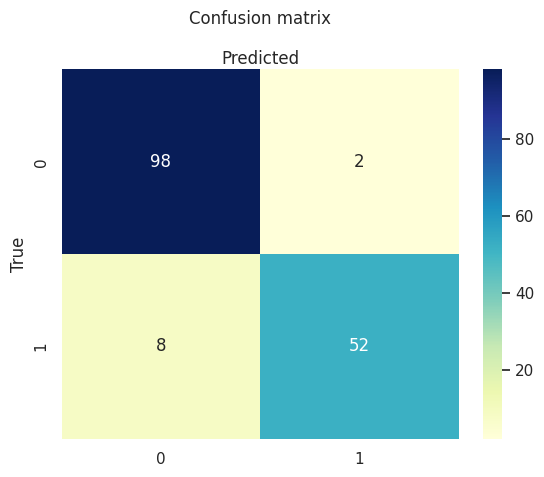

In [148]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

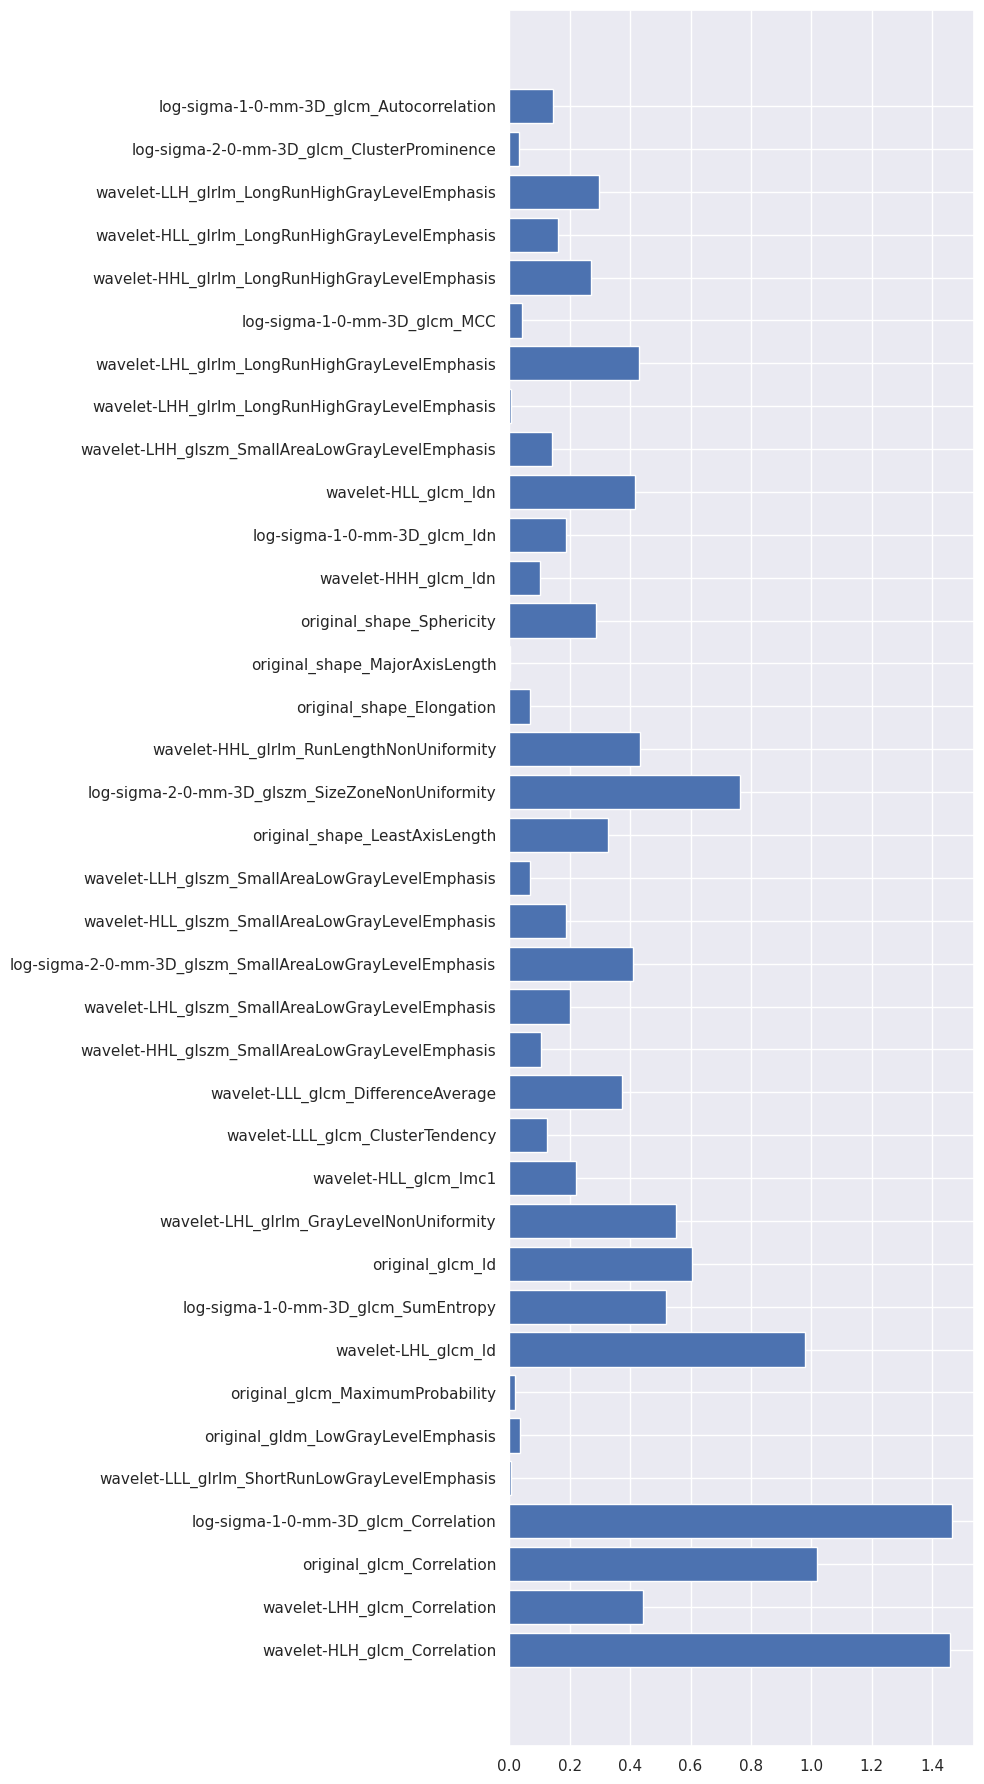

In [149]:
# Plot feature coefficients
fig = plt.figure(figsize=(10,18))
plt.barh(columns,abs(model.coef_[0]))
fig.tight_layout()

In [150]:
# Coefficients values of the model
coefs = pd.DataFrame(
    model.coef_.T,
    columns=["Coefficients"],
    index=columns,
)
abs(coefs).sort_values(by='Coefficients', ascending=False)

Coefficients
log-sigma-1-0-mm-3D_glcm_Correlation                    1.465848
wavelet-HLH_glcm_Correlation                            1.458032
original_glcm_Correlation                               1.018402
wavelet-LHL_glcm_Id                                     0.979882
log-sigma-2-0-mm-3D_glszm_SizeZoneNonUniformity         0.764705
original_glcm_Id                                        0.605121
wavelet-LHL_glrlm_GrayLevelNonUniformity                0.551854
log-sigma-1-0-mm-3D_glcm_SumEntropy                     0.517330
wavelet-LHH_glcm_Correlation                            0.443638
wavelet-HHL_glrlm_RunLengthNonUniformity                0.433934
wavelet-LHL_glrlm_LongRunHighGrayLevelEmphasis          0.428886
wavelet-HLL_glcm_Idn                                    0.415650
log-sigma-2-0-mm-3D_glszm_SmallAreaLowGrayLevel...      0.409966
wavelet-LLL_glcm_DifferenceAverage                      0.373033
original_shape_LeastAxisLength                          0.326266
wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis          0.295185
original_shape_Sphericity                               0.285273
wavelet-HHL_glrlm_LongRunHighGrayLevelEmphasis          0.269251
wavelet-HLL_glcm_Imc1                                   0.221316
wavelet-LHL_glszm_SmallAreaLowGrayLevelEmphasis         0.201065
log-sigma-1-0-mm-3D_glcm_Idn                            0.187663
wavelet-HLL_glszm_SmallAreaLowGrayLevelEmphasis         0.187205
wavelet-HLL_glrlm_LongRunHighGrayLevelEmphasis          0.159313
log-sigma-1-0-mm-3D_glcm_Autocorrelation                0.145144
wavelet-LHH_glszm_SmallAreaLowGrayLevelEmphasis         0.141642
wavelet-LLL_glcm_ClusterTendency                        0.124281
wavelet-HHL_glszm_SmallAreaLowGrayLevelEmphasis         0.104054
wavelet-HHH_glcm_Idn                                    0.101436
original_shape_Elongation                               0.069645
wavelet-LLH_glszm_SmallAreaLowGrayLevelEmphasis         0.067541
log-sigma-1-0-mm-3D_glcm_MCC                            0.042935
original_gldm_LowGrayLevelEmphasis                      0.034902
log-sigma-2-0-mm-3D_glcm_ClusterProminence              0.030719
original_glcm_MaximumProbability                        0.018566
wavelet-LHH_glrlm_LongRunHighGrayLevelEmphasis          0.006410
wavelet-LLL_glrlm_ShortRunLowGrayLevelEmphasis          0.004488
original_shape_MajorAxisLength                          0.001562

### SVM classifier

In [ ]:
from sklearn import svm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

space = dict()
#model = svm.SVC(decision_function_shape='ovo', random_state=42)
model = svm.SVC(random_state=1)
#SVC
space['C'] = [0.1, 1, 10, 100, 500, 1000]
space['kernel'] = ['rbf', 'linear']
space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto']

cv_inner = KFold(n_splits=2, shuffle=True, random_state=42)

# define search
search = RandomizedSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
"""	space['C'] = [0.1, 1, 10, 100, 500, 1000]
	space['kernel'] = ['rbf', 'linear']
	space['gamma'] = [1, 0.1, 0.01, 0.001, 0.0001]"""

result = search.fit(X_train, y_train)
# get the best performing model fit on the whole training set
best_model = result.best_estimator_
# evaluate model on the hold out dataset
yhat = best_model.predict(X_test)
# evaluate the model
acc = metrics.accuracy_score(y_test, yhat)
# Precision
P = metrics.precision_score(y_test,yhat)
# Recall
R = metrics.recall_score(y_test,yhat)
# F1 score
F1 = metrics.f1_score(y_test,yhat)

# report progress
print('>acc=%.3f, est=%.3f, cfg=%s' % (acc, result.best_score_, result.best_params_))

#model.fit(X_train, y_train)
#y_pred = model.predict(X_test)

>acc=0.880, est=0.872, cfg={'kernel': 'rbf', 'gamma': 0.1, 'C': 10}


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred)))
print('F1 Score : ' + str(metrics.f1_score(y_test,y_pred)))

Accuracy: 0.8453468279437176
Precision Score : 0.7511075312122433
Recall Score : 0.746
F1 Score : 0.7485450531808148


Text(0.5, 15.0, 'Predicted')

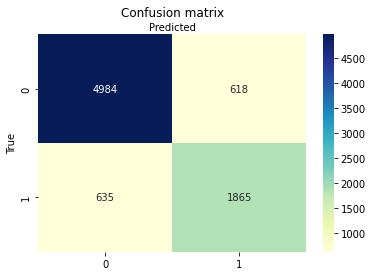

In [ ]:
import seaborn as sns

labels = [-1, 0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

### Gaussian Mixture

In [ ]:
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot

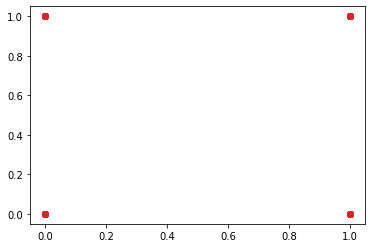

In [ ]:
# define the model
model = GaussianMixture(n_components=4, random_state=0)
# assign a cluster to each example
y_pred = model.fit_predict(x)
# retrieve unique clusters
clusters = unique(y_pred)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_pred == cluster)
    # create scatter of these samples
    pyplot.scatter(x[row_ix, 0], x[row_ix, 1])
# show the plot
pyplot.show()

Text(0.5, 1.0, 'Gaussian Mixture Models information criterion')

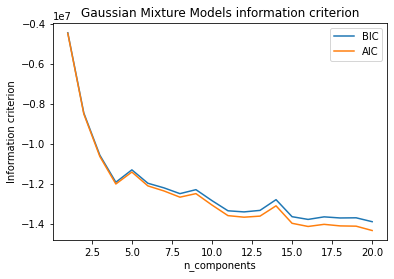

In [ ]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(x)
          for n in n_components]

plt.plot(n_components, [m.bic(x) for m in models], label='BIC')
plt.plot(n_components, [m.aic(x) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.ylabel('Information criterion')
plt.title('Gaussian Mixture Models information criterion')

In [ ]:
[m.bic(x) for m in models]

[-4454679.161435582,
 -8461229.166889073,
 -10566227.048445879,
 -11919543.166833878,
 -11300640.242021333,
 -11969836.031934777,
 -12199500.846567096,
 -12488870.226817627,
 -12290375.684753928,
 -12837644.303318206,
 -13345823.138430804,
 -13401578.402616635,
 -13325835.090479665,
 -12789916.656051522,
 -13640662.593878295,
 -13776887.345880002,
 -13648783.659465257,
 -13704634.650456797,
 -13696356.209408615,
 -13890871.01012626]

In [ ]:
gaus_means = model.means_
gaus_means = pd.DataFrame(data = gaus_means, columns = features_of_interest)
gaus_means

BA1       BP1       BP4       BP6       BS1       BS2  \
0  0.000000  0.105534  0.000000  0.000000  0.000000  0.000000   
1  0.999750  0.066494  0.473454  0.157541  0.999750  0.125583   
2  0.000000  0.097157  0.112714  0.000000  0.000000  0.000000   
3  0.370072  0.106257  0.263878  0.176480  0.455754  0.264728   

   BayesDel_addAF_rankscore  BayesDel_noAF_rankscore  CADD_raw_rankscore  \
0                  0.857046                 0.863540            0.765708   
1                  0.003887                 0.168820            0.219808   
2                  0.570489                 0.585770            0.612597   
3                  0.293211                 0.476581            0.468048   

    CLNSIG0   CLNSIG1  CLNSIG11  CLNSIG12  CLNSIG14   CLNSIG2   CLNSIG3  \
0  0.000000  0.000000   0.00000  0.017277  0.106543  0.075442  0.410110   
1  0.171479  0.015062   0.00000  0.000125  0.000000  0.000000  0.000000   
2  0.000000  0.000000   0.00000  0.000000  0.000000  0.031280  0.000000   
3  0.138557  0.079730   0.02174  0.015346  0.086957  0.065221  0.052274   

    CLNSIG4   CLNSIG5   CLNSIG6   CLNSIG7   CLNSIG8   CLNSIG9  \
0  0.428638  0.006911  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.002871  0.000749  0.000375  0.000749  0.000375   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.062284  0.000000  0.000000  0.037087  0.000000  0.000000   

   ClinPred_rankscore  DANN_rankscore  DEOGEN2_rankscore  \
0            0.820675        0.786031           0.933388   
1            0.008873        0.263352           0.269306   
2            0.606442        0.681763           0.634098   
3            0.262686        0.543591           0.570234   

   Eigen-PC-raw_coding_rankscore  Eigen-raw_coding_rankscore  \
0                       0.789301                    0.784640   
1                       0.203588                    0.187910   
2                       0.623999                    0.611527   
3                       0.442977                    0.433904   

   FATHMM_converted_rankscore  GERP++_NR  GERP++_RS_rankscore  GTEx_V8_gene  \
0                    0.849679   0.892584             0.717863      0.000000   
1                    0.408780   0.819616             0.320550      0.810629   
2                    0.564588   0.873960             0.623798      0.000000   
3                    0.580183   0.839492             0.478172      0.285638   

   GenoCanyon_rankscore   ICGC_Id  Interpro_domain  LIST-S2_rankscore  \
0              0.659259  0.637062         0.960839           0.812293   
1              0.375066  0.955102         0.779418           0.208778   
2              0.574900  0.706505         0.877898           0.663983   
3              0.573579  0.745348         0.827358           0.478103   

   LRT_converted_rankscore  MPC_rankscore  MetaLR_rankscore  \
0                 0.744920       0.787851          0.885979   
1                 0.272464       0.245973          0.019330   
2                 0.576968       0.582718          0.605980   
3                 0.437694       0.473605          0.415253   

   MetaRNN_rankscore  MetaSVM_rankscore  MutationAssessor_rankscore  \
0           0.894176           0.886100                    0.699365   
1           0.000237           0.310697                    0.247521   
2           0.620825           0.601847                    0.566998   
3           0.260667           0.495407                    0.435113   

   MutationTaster_converted_rankscore       PM1       PM2       PM5       PP2  \
0                            0.759003  0.903513  0.967057  0.085809  0.241969   
1                            0.235053  0.436373  0.000000  0.000000  0.032082   
2                            0.586119  0.623545  0.886058  0.000000  0.082264   
3                            0.454175  0.564609  0.412784  0.000000  0.117448   

        PP3       PP5  PROVEAN_converted_rankscore       PS1       PS3  \
0  0.777465  0.783459                     0.792846  0.014397  0

In [ ]:
# Merge clusters
'''y_pred[y_pred == 0] = 8
y_pred[y_pred == 1] = 0
y_pred[y_pred == 3] = 0
y_pred[y_pred == 2] = 1
y_pred[y_pred == 8] = 1'''

y_pred[y_pred == 0] = 8
y_pred[y_pred == 1] = 0
y_pred[y_pred == 3] = 0
y_pred[y_pred == 2] = 0
y_pred[y_pred == 8] = 1

In [ ]:
np.unique(y_pred)

array([1, 8])

In [ ]:
print("Accuracy:", metrics.accuracy_score(y, y_pred))
print('Precision Score : ' + str(metrics.precision_score(y,y_pred)))
print('Recall Score : ' + str(metrics.recall_score(y,y_pred)))
print('F1 Score : ' + str(metrics.f1_score(y,y_pred)))

Accuracy: 0.7311190874225587
Precision Score : 0.9461009174311926
Recall Score : 0.1320739614183943
F1 Score : 0.2317904052820117


Text(0.5, 15.0, 'Predicted')

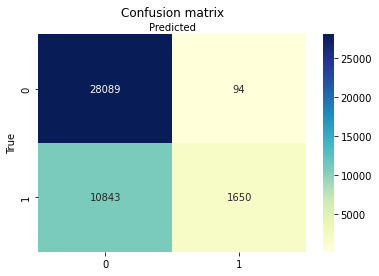

In [ ]:
import seaborn as sns

labels = [-1, 0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
cnf_matrix = metrics.confusion_matrix(y, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

### K-means

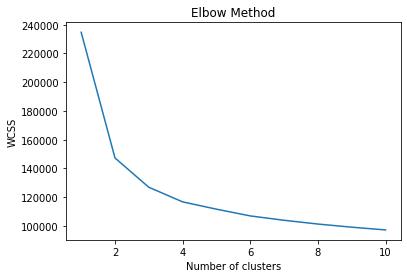

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_normalized = scaler.fit_transform(x)
X_normalized = np.copy(x)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', random_state = 42)
    kmeans.fit(X_normalized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
X_normalized = np.copy(x)
y_kmeans = kmeans.fit_predict(X_normalized)

In [ ]:
#Centers = scaler.inverse_transform(kmeans.cluster_centers_)
features_to_plot = plot_df.columns[:-1]

Centers = kmeans.cluster_centers_
df_centers = pd.DataFrame(data = Centers,
                  columns = features_to_plot)

df_centers

BA1       BP1       BP4       BP6       BS1       BS2  BayesDel_addAF  \
0  0.003727  0.106234  0.014632  0.002538  0.005036  0.004759        0.690116   
1  0.530728  0.067861  0.454651  0.086428  0.532928  0.070708        0.099870   

   BayesDel_noAF  CADD_raw   CLNSIG0   CLNSIG1  CLNSIG11  CLNSIG12  CLNSIG14  \
0       0.706282  0.727768  0.001547  0.001269  0.000436  0.001229  0.008803   
1       0.198776  0.231045  0.093350  0.009768  0.000388  0.000776  0.002005   

    CLNSIG2   CLNSIG3   CLNSIG4   CLNSIG5       CLNSIG6   CLNSIG7  \
0  0.039020  0.029423  0.030534  0.000595  3.279712e-17  0.000198   
1  0.009121  0.000712  0.001488  0.001294  3.881485e-04  0.001747   

        CLNSIG8       CLNSIG9  ClinPred      DANN   DEOGEN2  \
0  3.279712e-17  1.639856e-17  0.723641  0.789058  0.743458   
1  3.881485e-04  1.940743e-04  0.112251  0.294617  0.297036   

   Eigen-PC-raw_coding  Eigen-raw_coding  FATHMM_converted  GERP++_NR  \
0             0.747437          0.735243          0.627380   0.887841   
1             0.214169          0.200634          0.414221   0.823502   

   GERP++_RS  GTEx_V8_gene  GenoCanyon   ICGC_Id  Interpro_domain   LIST-S2  \
0   0.714871      0.002776    0.649798  0.696130         0.911095  0.766056   
1   0.321274      0.430004    0.358565  0.846423         0.779467  0.268823   

   LRT_converted       MPC    MetaLR   MetaRNN  MetaSVM  MutationAssessor  \
0       0.681776  0.683551  0.707564  0.745959  0.69797          0.647622   
1       0.260006  0.261235  0.158049  0.107571  0.32070          0.278108   

   MutationTaster_converted       PM1       PM2       PM5       PP2       PP3  \
0                  0.691128  0.699540  0.904989  0.005869  0.105401  0.441708   
1                  0.245626  0.431039  0.381162  0.000065  0.038233  0.004852   

        PP5  PROVEAN_converted           PS1       PS3      PS4  \
0  0.056706           0.685587  1.070664e-03  0.002062  0.00004   
1  0.004658           0.267814  5.084908e-17  0.000453  0.00097   

   Polyphen2_HDIV  Polyphen2_HVAR  PrimateAI     REVEL  SIFT4G_converted  \
0        0.711878        0.709709   0.694292  0.748357          0.666502   
1        0.241738        0.226451   0.227139  0.267365          0.274178   

   SIFT_converted  SiPhy_29way_logOdds     VEST4  avsnp150  cosmic70  \
0        0.666747              0.76139  0.737038  0.217860  0.581489   
1        0.251254              0.31614  0.165785  0.655324  0.265946   

   fathmm-MKL_coding  fathmm-XF_coding  integrated_confidence_value  \
0           0.726680          0.748030                     0.001877   
1           0.246712          0.247309                     0.004981   

   integrated_fitCons  phastCons100way_vertebrate  phastCons30way_mammalian  \
0            0.595825                    0.671456                  0.641314   
1            0.450361                    0.299263                  0.310807   

   phyloP100way_vertebrate  phyloP30way_mammalian  
0                 0.732651               0.596746  
1                 0.287547               0.296985

In [ ]:
# Merge clusters
#y_kmeans[y_kmeans == 1] = 0
#y_kmeans[y_kmeans == 3] = 0
#y_kmeans[y_kmeans == 2] = 1

print("Accuracy:", metrics.accuracy_score(y, 1-y_kmeans))
print('Precision Score : ' + str(metrics.precision_score(y,1-y_kmeans)))
print('Recall Score : ' + str(metrics.recall_score(y,1-y_kmeans)))
print('F1 Score : ' + str(metrics.f1_score(y,1-y_kmeans)))

Accuracy: 0.6783115350575277
Precision Score : 0.488260490203855
Recall Score : 0.9854318418314256
F1 Score : 0.6529822048956427


Text(0.5, 15.0, 'Predicted')

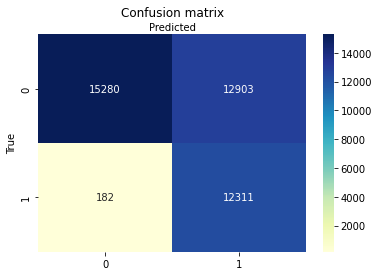

In [ ]:
import seaborn as sns

labels = [-1, 0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
cnf_matrix = metrics.confusion_matrix(y, 1-y_kmeans)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
out_path = '/content/drive/MyDrive/UPM-MASTER/2 INGLES/GATV - TFM/'
df_centers.to_csv(out_path + 'KMEANS_CENTROIDS.csv', index=False,float_format='%.2f')

In [ ]:
# Create Dataframes of the clusters to be explored
"""cluster_0_idx = where(y_kmeans == 0)
cluster_0 = annovar_ft_norm.loc[cluster_0_idx]

cluster_1_idx = where(y_kmeans == 1)
cluster_1 = annovar_ft_norm.loc[cluster_1_idx]

cluster_2_idx = where(y_kmeans == 2)
cluster_2 = annovar_ft_norm.loc[cluster_2_idx]

cluster_3_idx = where(y_kmeans == 3)
cluster_3 = annovar_ft_norm.loc[cluster_3_idx]"""

'cluster_0_idx = where(y_kmeans == 0)\ncluster_0 = annovar_ft_norm.loc[cluster_0_idx]\n\ncluster_1_idx = where(y_kmeans == 1)\ncluster_1 = annovar_ft_norm.loc[cluster_1_idx]\n\ncluster_2_idx = where(y_kmeans == 2)\ncluster_2 = annovar_ft_norm.loc[cluster_2_idx]\n\ncluster_3_idx = where(y_kmeans == 3)\ncluster_3 = annovar_ft_norm.loc[cluster_3_idx]'

### Hierarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
X_normalized = np.copy(x)
distance_matrix = linkage(X_normalized, "ward")
c, coph_distance = cophenet(distance_matrix, pdist(X_normalized))
print ("Cophenet Distance = " + str(c))

In [ ]:
def dendrogram_tune(*args, **kwargs):
    max_d = kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args,**kwargs)

    if not kwargs.get('no_plot', False):
        plt.title("Final Dendrogram")
        plt.xlabel("Cluster Size")
        plt.ylabel("Distance")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x,y,'o',c = c)
                plt.annotate('%.3g' %y, (x,y), xytext = (0,-5),
                            textcoords = "offset points", va = "top", ha = "center")
    if max_d:
        plt.axhline(y = max_d, c = 'k')

    return ddata

dendrogram_tune(distance_matrix, truncate_mode = 'lastp',p = 12, leaf_rotation = 90., leaf_font_size = 12.,
                show_contracted = True, annotate_above = 10, max_d = 200)
plt.show()

### Decission Tree Classifier

In [151]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=42)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [152]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred)))
print('F1 Score : ' + str(metrics.f1_score(y_test,y_pred)))

Accuracy: 0.8625
Precision Score : 0.9130434782608695
Recall Score : 0.7
F1 Score : 0.7924528301886793


Text(0.5, 19.049999999999997, 'Predicted')

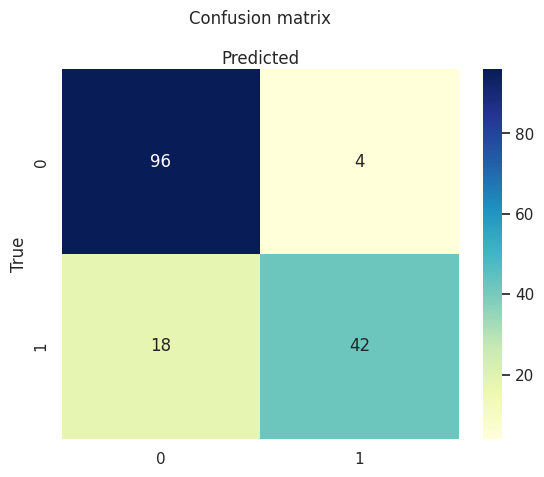

In [153]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

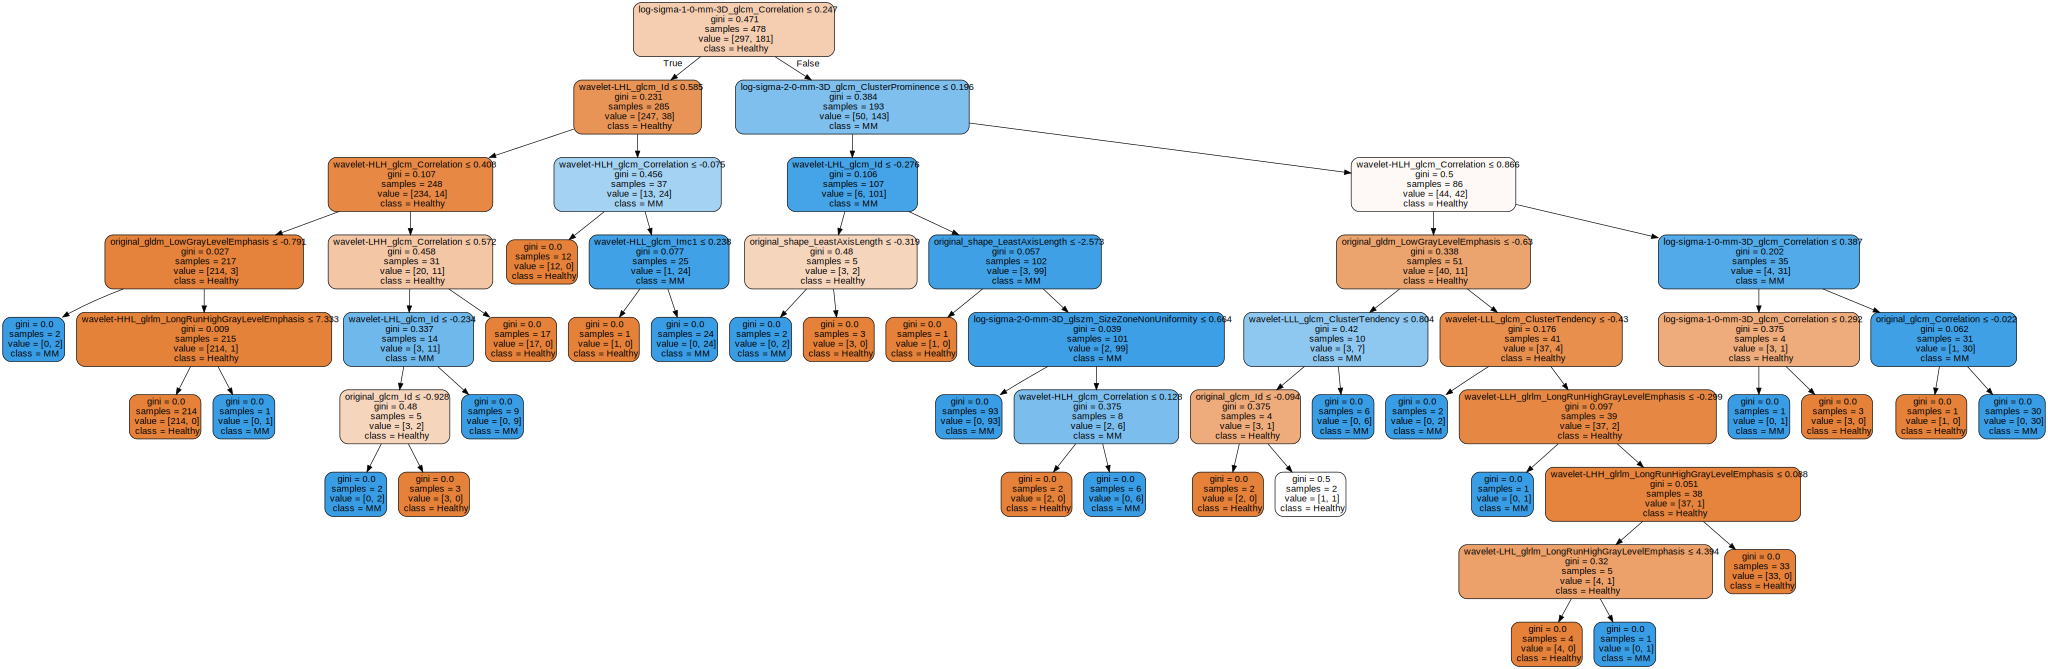

In [154]:
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, feature_names=columns,  class_names=['Healthy', 'MM'],  filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(dot_data)
graph

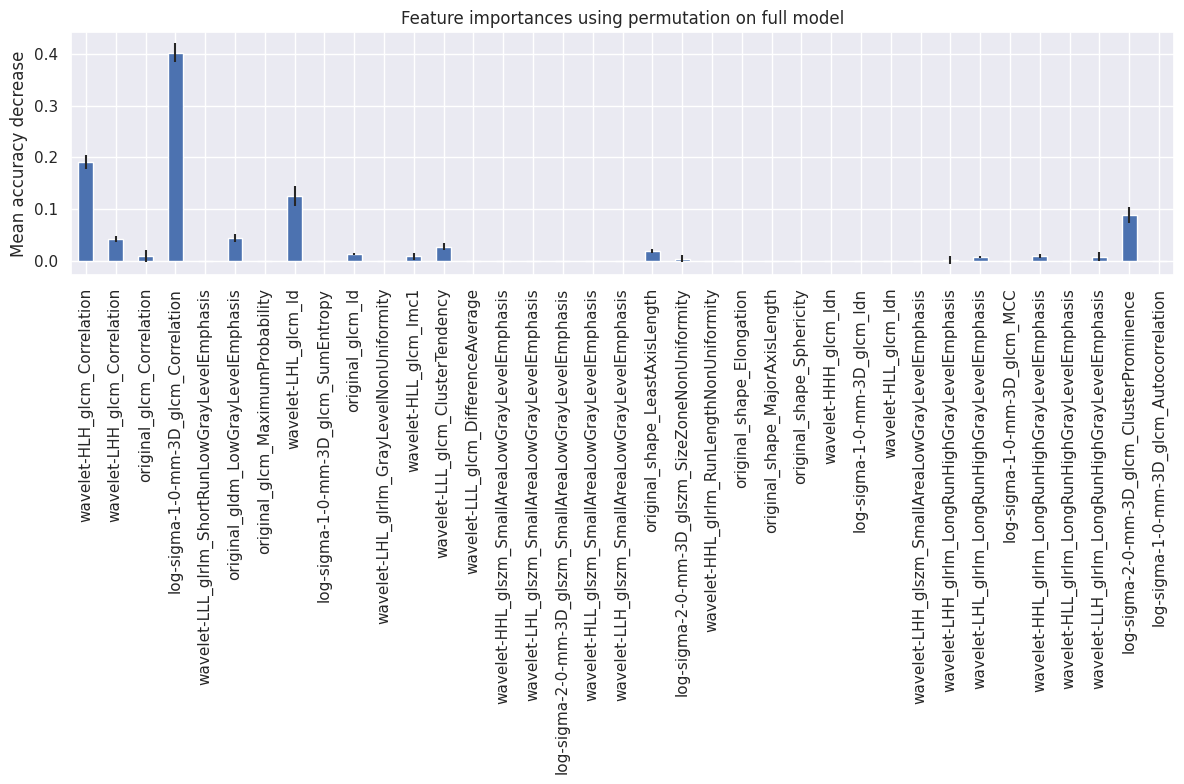

In [155]:
from sklearn.inspection import permutation_importance
importances = model.feature_importances_
forest_importances = pd.Series(importances, index=columns)
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
fig, ax = plt.subplots(figsize=(12, 8))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### RF Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 200, max_depth=4, random_state=42)
history = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred)))
print('F1 Score : ' + str(metrics.f1_score(y_test,y_pred)))

Accuracy: 0.8223895334485313
Precision Score : 0.7153877385302476
Recall Score : 0.7048
F1 Score : 0.7100544025790853


Text(0.5, 15.0, 'Predicted')

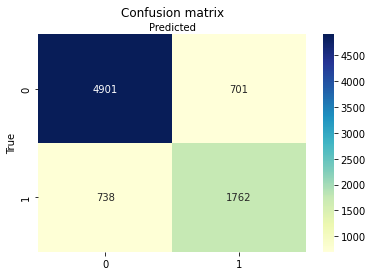

In [ ]:
import seaborn as sns

labels = [-1, 0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

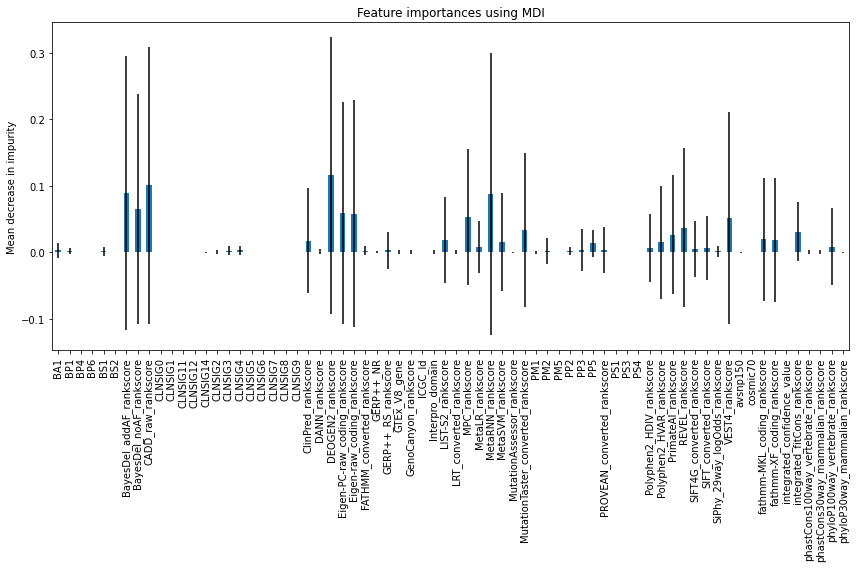

In [ ]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features_of_interest)

fig, ax = plt.subplots(figsize=(12, 8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

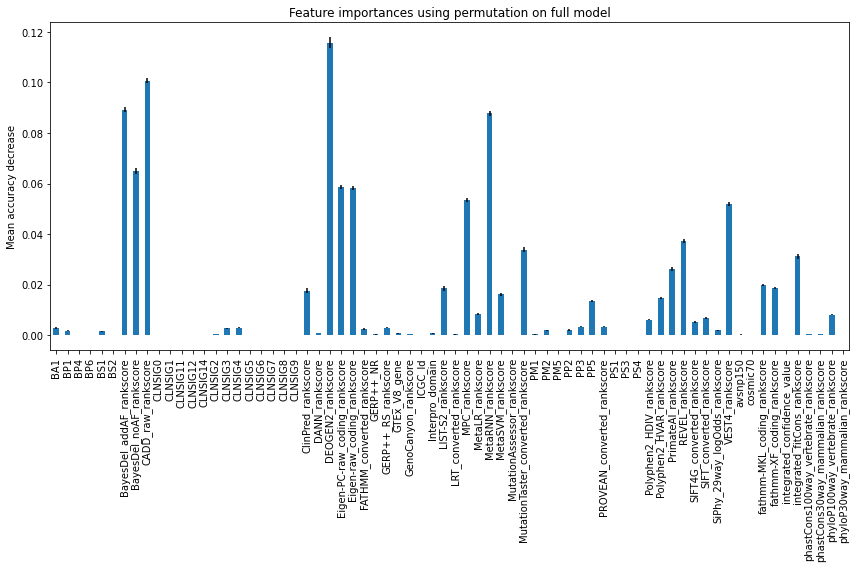

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
fig, ax = plt.subplots(figsize=(12, 8))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(RandomForestClassifier(n_estimators = 200, max_depth=4, random_state=42), x, y, cv=2)

In [ ]:
train_scores

array([[0.85046729, 0.83964584],
       [0.83129066, 0.83386291],
       [0.82744747, 0.83102369],
       [0.825138  , 0.82856418],
       [0.82771167, 0.82471236]])

In [ ]:
valid_scores

array([[0.8194021 , 0.80760153],
       [0.82127053, 0.8194021 ],
       [0.81856623, 0.82205723],
       [0.82077884, 0.82215557],
       [0.82176222, 0.82328646]])

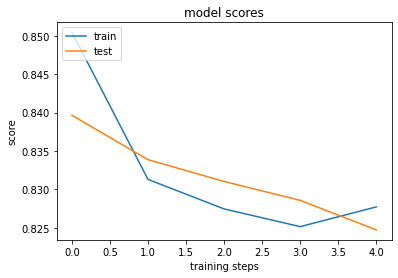

In [ ]:
plt.plot(train_scores)
#plt.plot(valid_scores)
plt.title('model scores')
plt.ylabel('score')
plt.xlabel('training steps')
plt.legend(['train', 'test'], loc='upper left')

# Show figure
plt.show()

### Reduced features from RF importances

In [ ]:
reduced_features = forest_importances[forest_importances >= 0.01].index

In [ ]:
X_train = np.array(annovar_train[reduced_features])
X_test = np.array(annovar_test[reduced_features])
print('Training data cases: ', len(X_train), ' Test data cases: ', len(X_test))

Training data cases:  32574  Test data cases:  8102


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 200, max_depth=4, random_state=42)
history = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('Accuracy Score : ' + str(metrics.accuracy_score(y_test,y_pred)))

Accuracy: 0.8275734386571217
Accuracy Score : 0.8275734386571217


### XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier(n_estimators=400, max_features=10, learning_rate = 0.1, seed=42)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print('Precision Score : ' + str(metrics.precision_score(y_test,y_pred)))
print('Recall Score : ' + str(metrics.recall_score(y_test,y_pred)))
print('F1 Score : ' + str(metrics.f1_score(y_test,y_pred)))

Accuracy: 0.8585534435941743
Precision Score : 0.7765522875816994
Recall Score : 0.7604
F1 Score : 0.7683912691996766


Text(0.5, 15.0, 'Predicted')

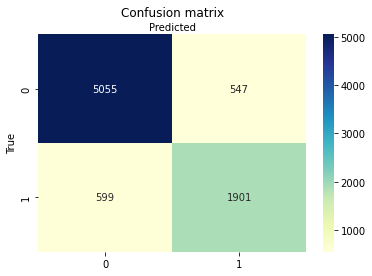

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

### PCA

In [122]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
my_pca = PCA(n_components=40)
preprocessed_train = preprocessing.normalize(preprocessing.scale(X))
print(preprocessed_train.shape)
#missing feature scaling and normalization
my_pca.fit(preprocessed_train)
trans = my_pca.transform(preprocessed_train)

(638, 49)


Text(0.5, 1.0, 'PCA cumulative variance per number of components')

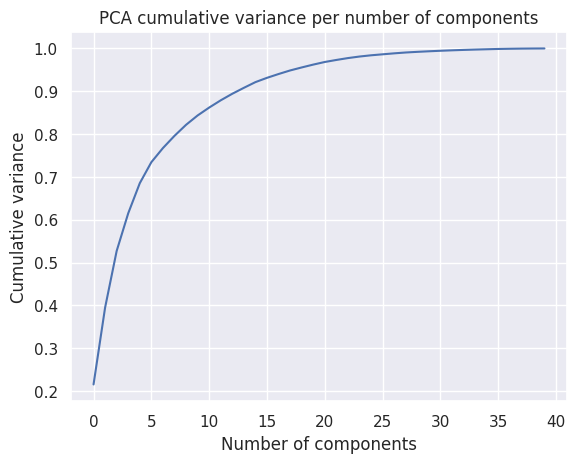

In [123]:
plt.plot(np.cumsum(my_pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance');
plt.title('PCA cumulative variance per number of components')

In [124]:
# TRANSFOR TO NEW X_TRAIN, X TEST OJO
X_train = my_pca.transform(X_train)
X_test = my_pca.transform(X_test)

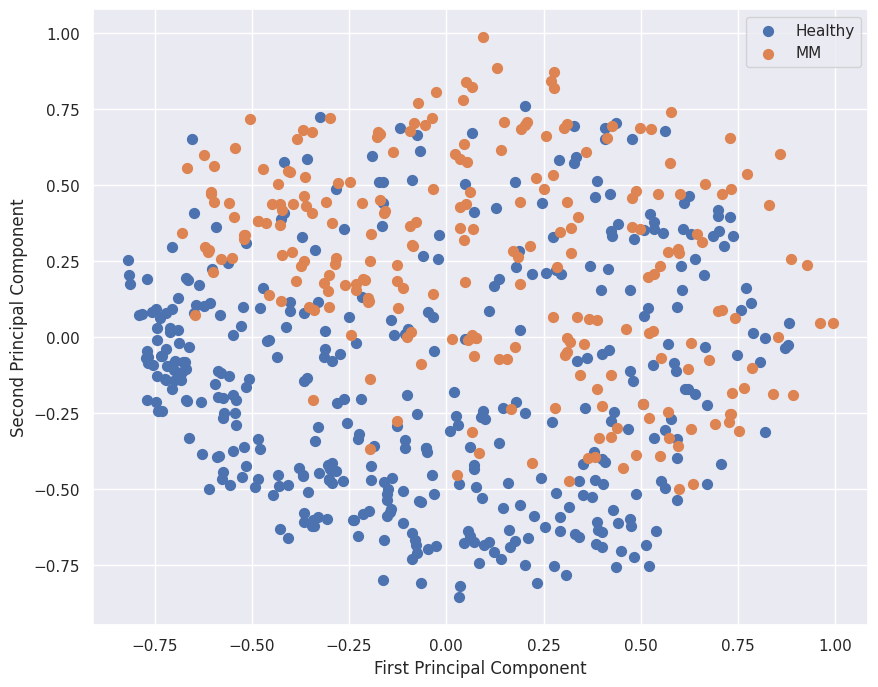

In [126]:
Z1 = my_pca.transform(preprocessed_train)[:,0] # see 'prcomp(my_data)$x' in R
Z2 = my_pca.transform(preprocessed_train)[:,1]
Z3 = my_pca.transform(preprocessed_train)[:,2]
group = y
gvalues = {0: "Healthy", 1: "MM"}

fig, ax = plt.subplots(figsize=(10, 8))
for g in np.unique(group):
  ix = np.where(group == g)
  ax.scatter(Z1[ix], Z2[ix], label = gvalues[g], s = 50)

ax.set(xlabel="First Principal Component", ylabel="Second Principal Component")
ax.legend()

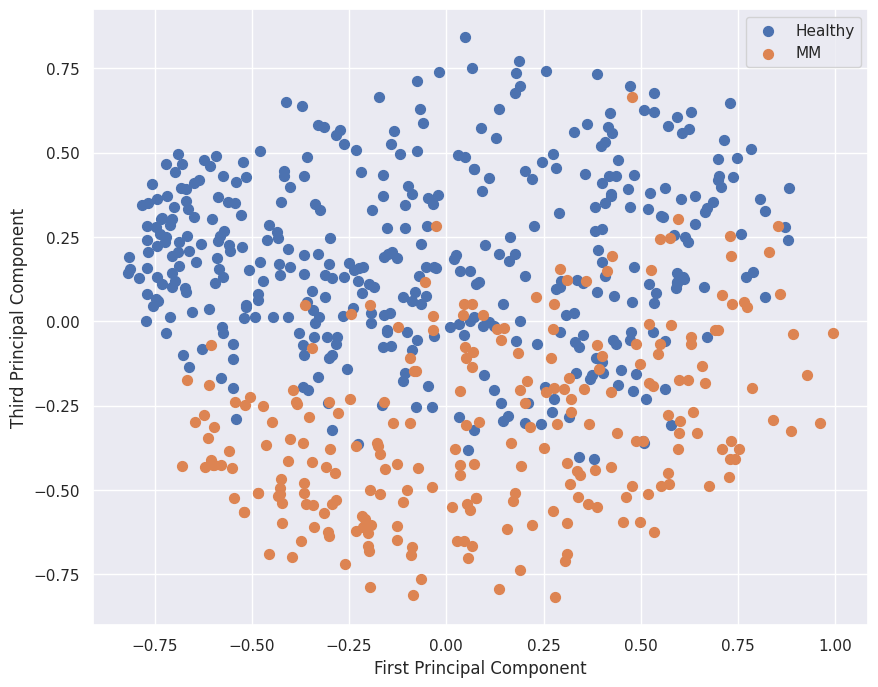

In [127]:
fig, ax = plt.subplots(figsize=(10, 8))
for g in np.unique(group):
  ix = np.where(group == g)
  ax.scatter(Z1[ix], Z3[ix], label = gvalues[g], s = 50)

ax.set(xlabel="First Principal Component", ylabel="Third Principal Component")
ax.legend()

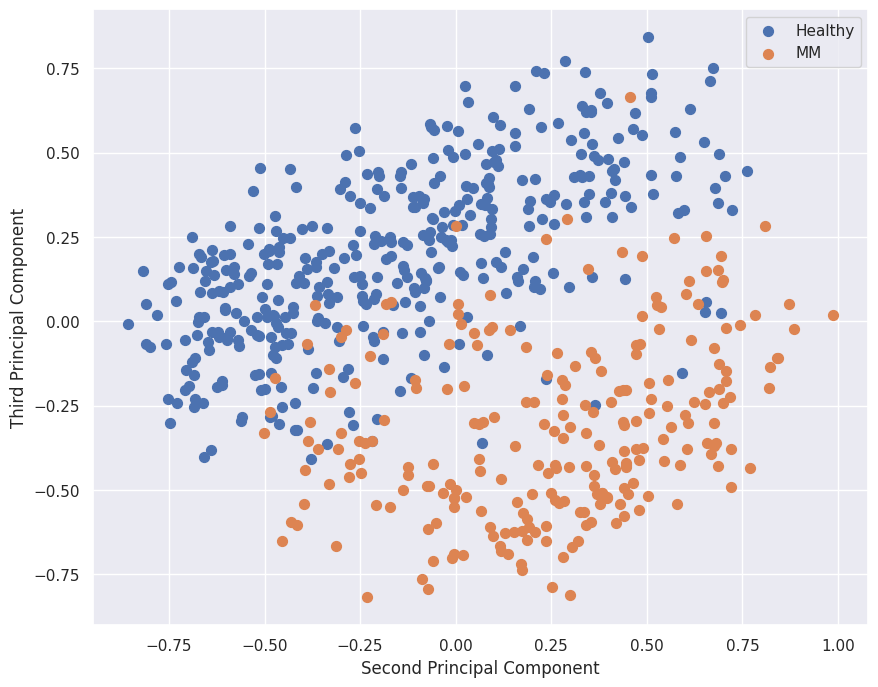

In [128]:
fig, ax = plt.subplots(figsize=(10, 8))
for g in np.unique(group):
  ix = np.where(group == g)
  ax.scatter(Z2[ix], Z3[ix], label = gvalues[g], s = 50)

ax.set(xlabel="Second Principal Component", ylabel="Third Principal Component")
ax.legend()

<BarContainer object of 49 artists>

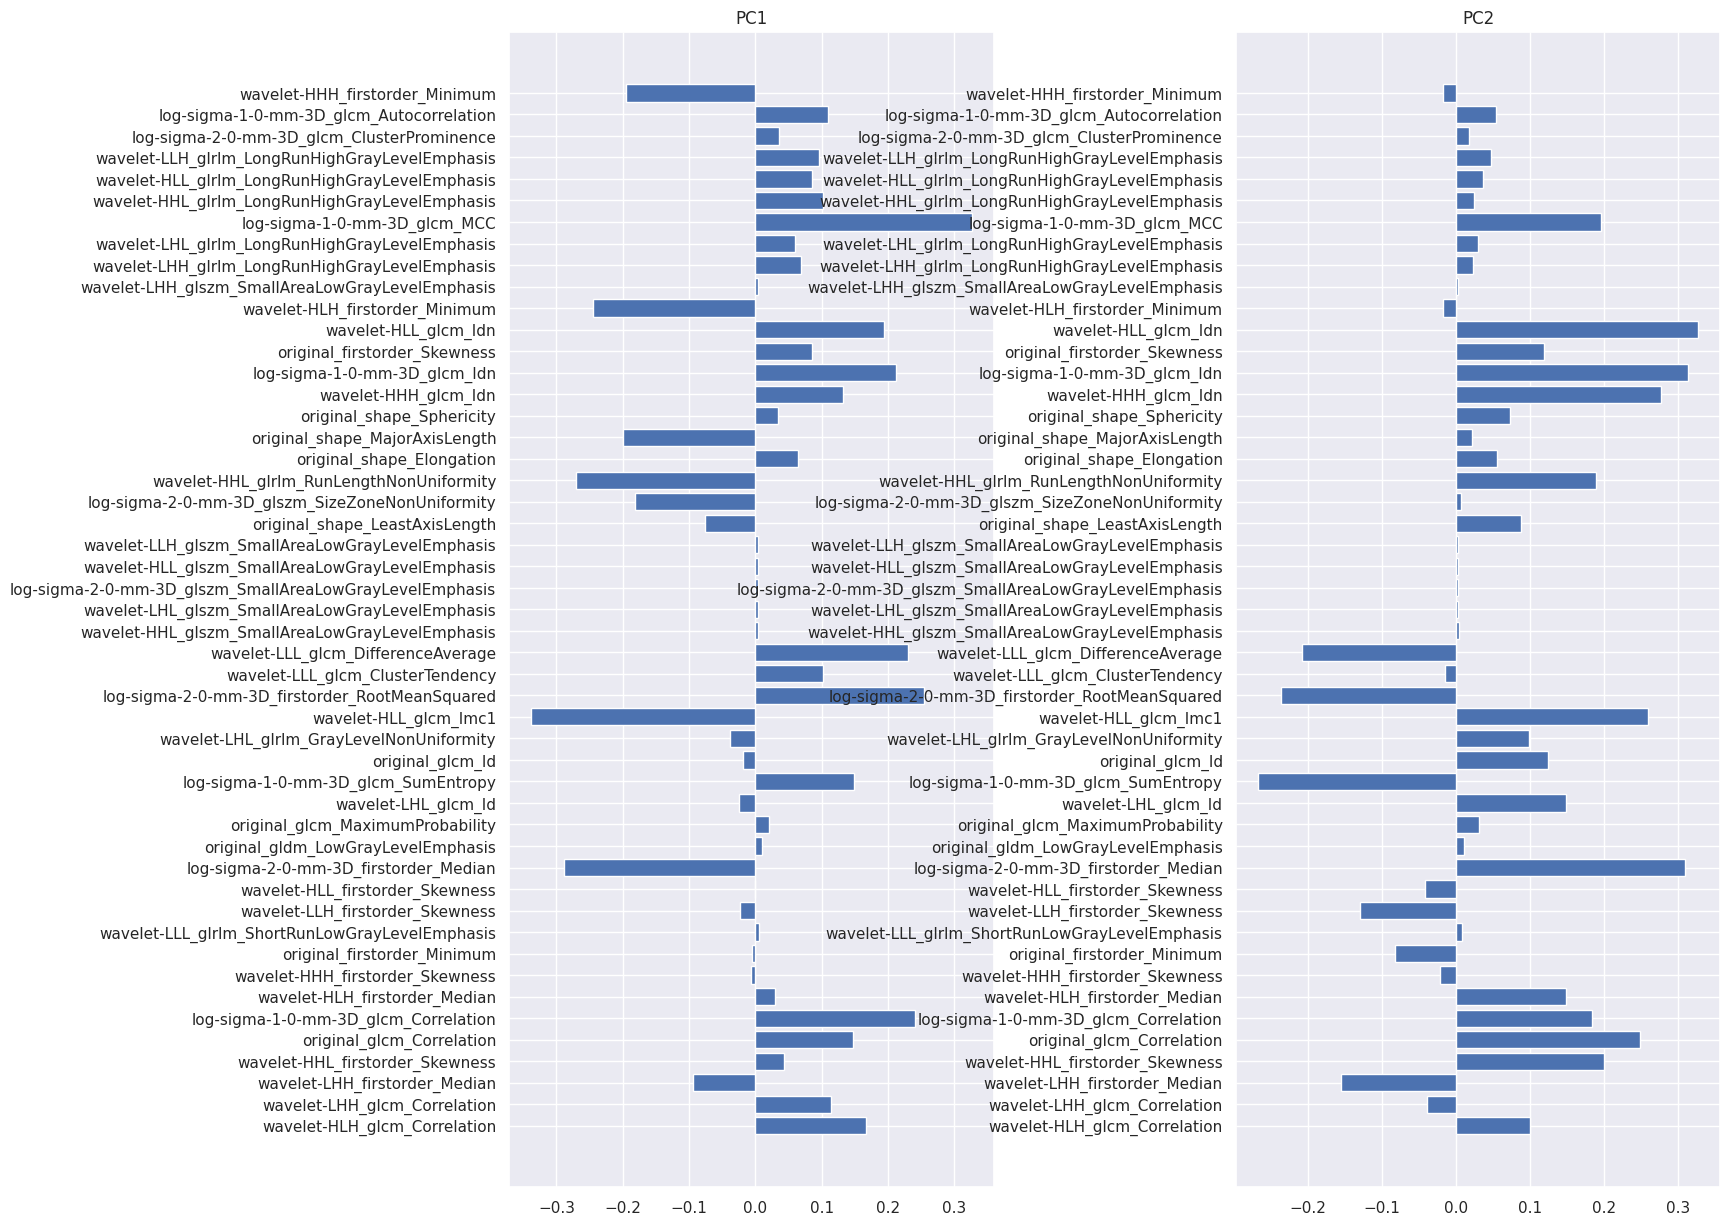

In [130]:
# 0,1 denote PC1 and PC2; change values for other PCs
PC1 = my_pca.components_[0] # see 'prcomp(my_data)$rotation' in R
PC2 = my_pca.components_[1]
PC3 = my_pca.components_[2]
features_to_plot = plot_df.columns[:-1]

plt.figure(figsize=(25,15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
#plt.subplots(1,2, sharey=True)
plt.subplot(131)
plt.barh(columns,PC1)
plt.title("PC1")
plt.subplot(132)
plt.title("PC2")
plt.barh(columns,PC2)
#plt.subplot(133)
#plt.title("PC3")
#plt.barh(features_to_plot,PC3)

## CHECK SINGLE VARIABLES

### First trials

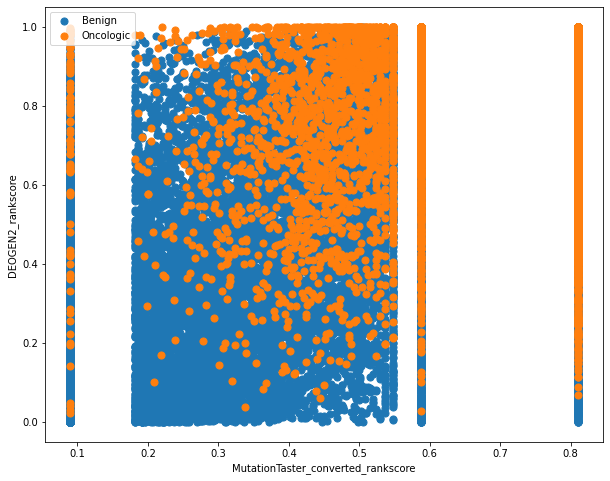

In [ ]:
Z1 = annovar_ft_norm['MutationTaster_converted_rankscore'].copy()
Z2 = annovar_ft_norm['DEOGEN2_rankscore'].copy()
group = annovar_ft_norm["GroundTruth"]
gvalues = {0: "Benign", 1: "Oncologic"}

fig, ax = plt.subplots(figsize=(10, 8))
for g in np.unique(group):
  ix = np.where(group == g)
  ax.scatter(Z1[ix[0]], Z2[ix[0]], label = gvalues[g], s = 50)

ax.set(xlabel="MutationTaster_converted_rankscore", ylabel="DEOGEN2_rankscore")
ax.legend()

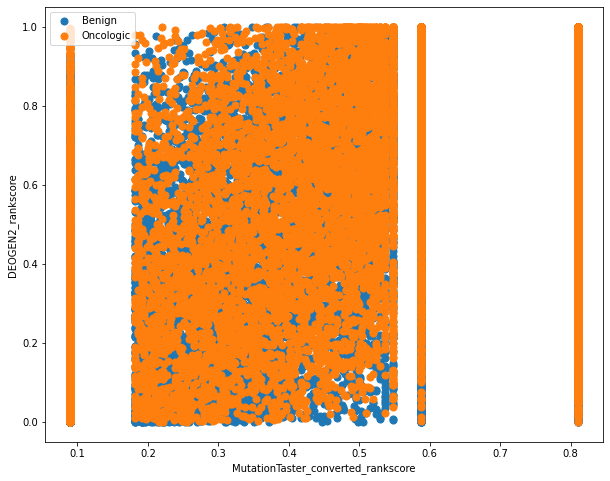

In [ ]:
Z1 = annovar_ft_norm['MutationTaster_converted_rankscore'].copy()
Z2 = annovar_ft_norm['DEOGEN2_rankscore'].copy()
group = annovar_ft_norm["cosmic70"]
gvalues = {0: "Benign", 1: "Oncologic"}

fig, ax = plt.subplots(figsize=(10, 8))
for g in np.unique(group):
  ix = np.where(group == g)
  ax.scatter(Z1[ix[0]], Z2[ix[0]], label = gvalues[g], s = 50)

ax.set(xlabel="MutationTaster_converted_rankscore", ylabel="DEOGEN2_rankscore")
ax.legend()

In [ ]:
(uniq, freq) = (np.unique(annovar_ft_norm['cosmic70'], return_counts=True))
print(np.column_stack((uniq,freq)))

[[    0 21857]
 [    1 18845]]


### avsnp150

In [ ]:
X = pd.concat([annovar_train,annovar_test])
Y = pd.concat([annovar_train,annovar_test])
avs = X['avsnp150'].copy()
gt = Y['gt']
#gt = X["GroundTruth"].copy()

Text(0.5, 15.0, 'Predicted')

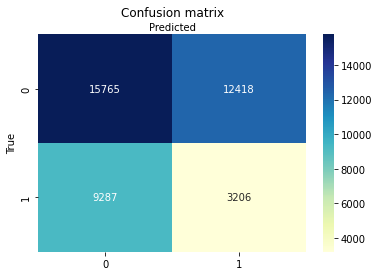

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(gt, avs)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print("Accuracy:", metrics.accuracy_score(gt, avs))
print('Precision Score : ' + str(metrics.precision_score(gt,avs)))
print('Recall Score : ' + str(metrics.recall_score(gt,avs)))
print('F1 Score : ' + str(metrics.f1_score(gt,avs)))

Accuracy: 0.46639295899301797
Precision Score : 0.20519713261648745
Recall Score : 0.25662370927719524
F1 Score : 0.22804708894974574


### CADD_raw_rankscore

In [ ]:
cadd = (annovar_ft_norm['CADD_raw_rankscore']>0.7).astype(int).copy()
gt = annovar_ft_norm["GroundTruth"].copy()

GroundTruth
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: CADD_raw_rankscore, dtype: object

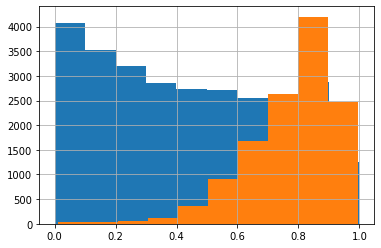

In [ ]:
annovar_ft_norm.groupby('GroundTruth')['CADD_raw_rankscore'].hist()

Text(0.5, 15.0, 'Predicted')

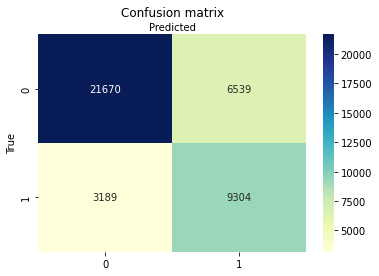

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(gt, cadd)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print("Accuracy:", metrics.accuracy_score(gt, cadd))
print('Precision Score : ' + str(metrics.precision_score(gt,cadd)))
print('Recall Score : ' + str(metrics.recall_score(gt,cadd)))
print('F1 Score : ' + str(metrics.f1_score(gt,cadd)))

Accuracy: 0.7609945457225689
Precision Score : 0.5872625134128637
Recall Score : 0.7447370527495397
F1 Score : 0.6566911349520046


### COSMIC AS UNIQUE PREDICTOR

In [ ]:
cos = annovar_ft_norm['cosmic70'].copy()
gt = annovar_ft_norm["GroundTruth"].copy()

Text(0.5, 15.0, 'Predicted')

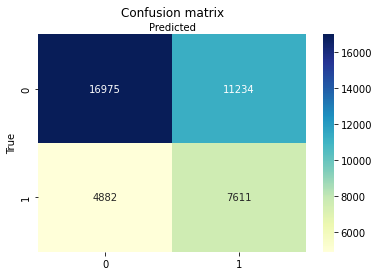

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(gt, cos)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print("Accuracy:", metrics.accuracy_score(gt, cos))
print('Precision Score : ' + str(metrics.precision_score(gt,cos)))
print('Recall Score : ' + str(metrics.recall_score(gt,cos)))
print('F1 Score : ' + str(metrics.f1_score(gt,cos)))

Accuracy: 0.6040489410839762
Precision Score : 0.40387370655346244
Recall Score : 0.609221163851757
F1 Score : 0.4857361669538579


### DEOGEN2 AS UNIQUE PREDICTOR

In [ ]:
deo = (annovar_ft_norm['DEOGEN2_rankscore']>0.6).astype(int).copy()
gt = annovar_ft_norm["GroundTruth"].copy()

GroundTruth
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DEOGEN2_rankscore, dtype: object

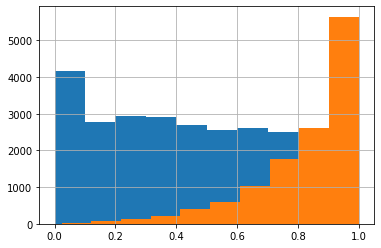

In [ ]:
annovar_ft_norm.groupby('GroundTruth')['DEOGEN2_rankscore'].hist()

Text(0.5, 15.0, 'Predicted')

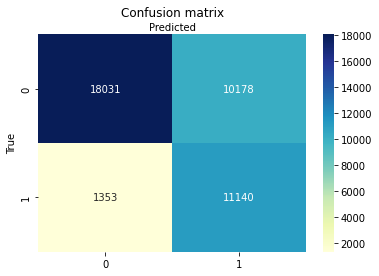

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(gt, deo)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print("Accuracy:", metrics.accuracy_score(gt, deo))
print('Precision Score : ' + str(metrics.precision_score(gt,deo)))
print('Recall Score : ' + str(metrics.recall_score(gt,deo)))
print('F1 Score : ' + str(metrics.f1_score(gt,deo)))

Accuracy: 0.7166969682079505
Precision Score : 0.5225630922225349
Recall Score : 0.8916993516369167
F1 Score : 0.6589571441246931


### BayesDel_addAF_rankscore

GroundTruth
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: BayesDel_addAF_rankscore, dtype: object

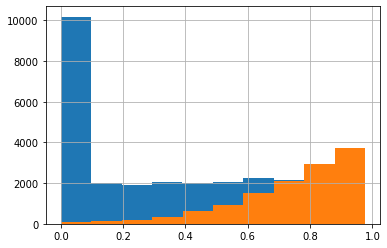

In [ ]:
annovar_ft_norm.groupby('GroundTruth')['BayesDel_addAF_rankscore'].hist()

In [ ]:
bay = (annovar_ft_norm['BayesDel_addAF_rankscore']>=0.6).astype(int).copy()
gt = annovar_ft_norm["GroundTruth"].copy()

Text(0.5, 15.0, 'Predicted')

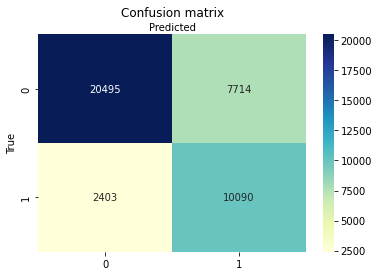

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(gt, bay)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print("Accuracy:", metrics.accuracy_score(gt, bay))
print('Precision Score : ' + str(metrics.precision_score(gt,bay)))
print('Recall Score : ' + str(metrics.recall_score(gt,bay)))
print('F1 Score : ' + str(metrics.f1_score(gt,bay)))

Accuracy: 0.7514372758095426
Precision Score : 0.5667265782970119
Recall Score : 0.8076522852797566
F1 Score : 0.666072548437139


### MutationTaster_converted_rankscore AS UNIQUE FEATURE

In [ ]:
muta = (annovar_ft_norm['MutationTaster_converted_rankscore']>0.6).astype(int).copy()
gt = annovar_ft_norm["GroundTruth"].copy()

GroundTruth
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: MutationTaster_converted_rankscore, dtype: object

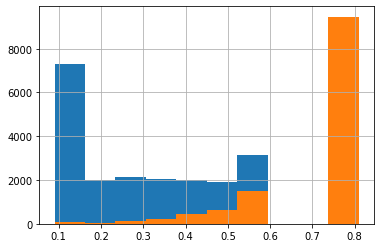

In [ ]:
annovar_ft_norm.groupby('GroundTruth')['MutationTaster_converted_rankscore'].hist()

Text(0.5, 15.0, 'Predicted')

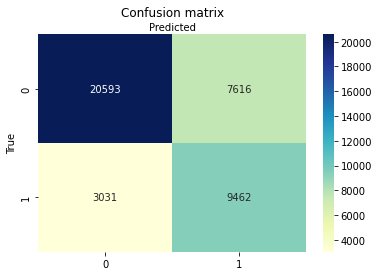

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(gt, muta)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print("Accuracy:", metrics.accuracy_score(gt, muta))
print('Precision Score : ' + str(metrics.precision_score(gt,muta)))
print('Recall Score : ' + str(metrics.recall_score(gt,muta)))
print('F1 Score : ' + str(metrics.f1_score(gt,muta)))

Accuracy: 0.7384158026632598
Precision Score : 0.5540461412343366
Recall Score : 0.7573841351156648
F1 Score : 0.6399513036420819


### PP5 and BA1 AS UNIQUE PREDICTOR

In [ ]:
pp = X['PP3'].copy()
#gt = annovar_ft_norm["GroundTruth"].copy()

Text(0.5, 15.0, 'Predicted')

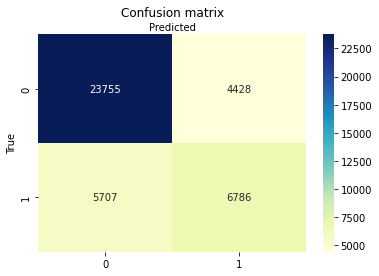

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(gt, pp)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print("Accuracy:", metrics.accuracy_score(gt, pp))
print('Precision Score : ' + str(metrics.precision_score(gt,pp)))
print('Recall Score : ' + str(metrics.recall_score(gt,pp)))
print('F1 Score : ' + str(metrics.f1_score(gt,pp)))

Accuracy: 0.7508358737338972
Precision Score : 0.6051364365971108
Recall Score : 0.5431841831425598
F1 Score : 0.572489138229215


In [ ]:
ba = X['BP6'].copy()
#gt = annovar_ft_norm["GroundTruth"].copy()

Text(0.5, 15.0, 'Predicted')

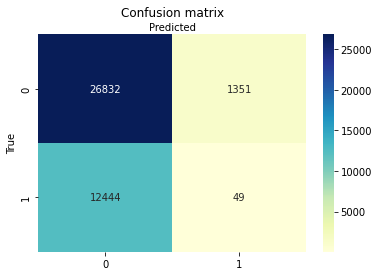

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(gt, ba)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print("Accuracy:", metrics.accuracy_score(gt, ba))
print('Precision Score : ' + str(metrics.precision_score(gt,ba)))
print('Recall Score : ' + str(metrics.recall_score(gt,ba)))
print('F1 Score : ' + str(metrics.f1_score(gt,ba)))

Accuracy: 0.6608565247320287
Precision Score : 0.035
Recall Score : 0.003922196430000801
F1 Score : 0.007053912042035558


### GTEx_V8

In [ ]:
gte = X['GTEx_V8_gene'].copy()
#gt = annovar_ft_norm["GroundTruth"].copy()

Text(0.5, 15.0, 'Predicted')

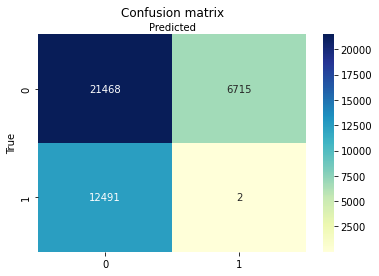

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(gt, gte)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print("Accuracy:", metrics.accuracy_score(gt, gte))
print('Precision Score : ' + str(metrics.precision_score(gt,gte)))
print('Recall Score : ' + str(metrics.recall_score(gt,gte)))
print('F1 Score : ' + str(metrics.f1_score(gt,gte)))

Accuracy: 0.5278296784344577
Precision Score : 0.0002977519726068185
Recall Score : 0.0001600896502041143
F1 Score : 0.00020822488287350338


### ICGC

In [ ]:
icgc = X['ICGC_Id'].copy()
#gt = annovar_ft_norm["GroundTruth"].copy()

Text(0.5, 15.0, 'Predicted')

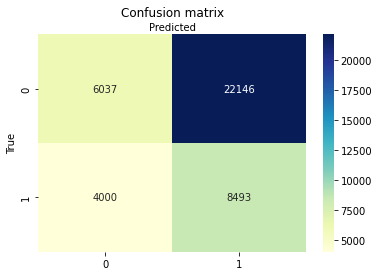

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(gt, icgc)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print("Accuracy:", metrics.accuracy_score(gt, icgc))
print('Precision Score : ' + str(metrics.precision_score(gt,icgc)))
print('Recall Score : ' + str(metrics.recall_score(gt,icgc)))
print('F1 Score : ' + str(metrics.f1_score(gt,icgc)))

Accuracy: 0.3572130986331006
Precision Score : 0.2771957309311662
Recall Score : 0.6798206995917714
F1 Score : 0.39381433738291755


### PM2

In [ ]:
pm2 = X['PM2'].copy()
#gt = annovar_ft_norm["GroundTruth"].copy()

Text(0.5, 15.0, 'Predicted')

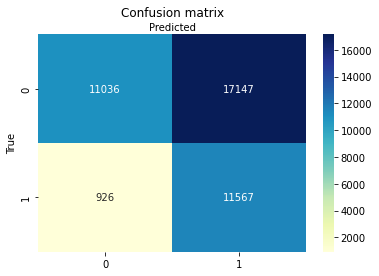

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(gt, pm2)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print("Accuracy:", metrics.accuracy_score(gt, pm2))
print('Precision Score : ' + str(metrics.precision_score(gt,pm2)))
print('Recall Score : ' + str(metrics.recall_score(gt,pm2)))
print('F1 Score : ' + str(metrics.f1_score(gt,pm2)))

Accuracy: 0.5556839413905006
Precision Score : 0.40283485407815
Recall Score : 0.9258784919554951
F1 Score : 0.5614094692649306


### POS AND CHROM analysis

GroundTruth
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: #CHROM, dtype: object

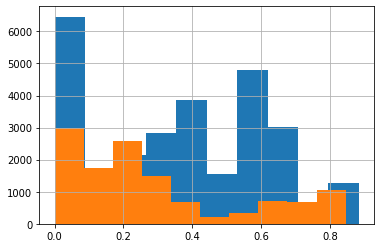

In [ ]:
annovar_ft_norm.groupby('GroundTruth')['#CHROM'].hist()

GroundTruth
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: POS, dtype: object

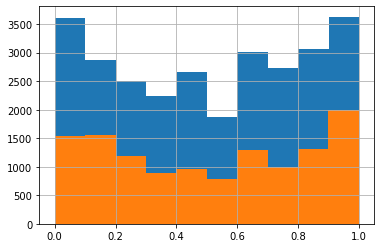

In [ ]:
annovar_ft_norm.groupby('GroundTruth')['POS'].hist()

### InterVar_automated0

GroundTruth
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: InterVar_automated0, dtype: object

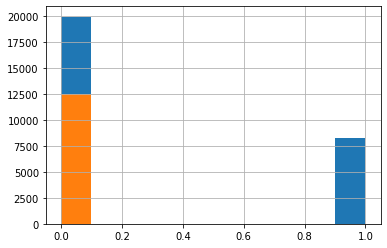

In [ ]:
annovar_ft_norm.groupby('GroundTruth')['InterVar_automated0'].hist()

In [ ]:
inter = annovar_ft_norm['InterVar_automated0'].astype(int).copy()
gt = annovar_ft_norm["GroundTruth"].copy()

Text(0.5, 15.0, 'Predicted')

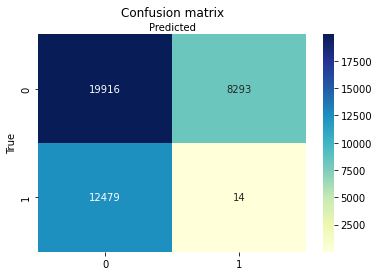

In [ ]:
# Plot confusion matrix
import seaborn as sns
labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
cnf_matrix = metrics.confusion_matrix(gt, inter)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
print("Accuracy:", metrics.accuracy_score(gt, inter))
print('Precision Score : ' + str(metrics.precision_score(gt,inter)))
print('Recall Score : ' + str(metrics.recall_score(gt,inter)))
print('F1 Score : ' + str(metrics.f1_score(gt,inter)))

Accuracy: 0.48965652793474523
Precision Score : 0.0016853256289876008
Recall Score : 0.0011206275514288
F1 Score : 0.001346153846153846
